In [1]:
from scipy.stats import chisquare
from scipy import stats
import urllib.request
import string
import requests
from bs4 import BeautifulSoup
import pandas as pd
import multiprocessing
import gensim
import sys
# import spacy
# nlp=spacy.load('en')
# nlp = spacy.load('en_coref_sm')  
import seaborn as sns
from nltk.tokenize import WordPunctTokenizer
tknzr = WordPunctTokenizer()
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from scipy import spatial
from collections import Counter
import numpy as np
from collections import defaultdict
from pprint import pprint
from gensim import corpora
import re
import logging
import requests
import urllib 
import re
import sys
import zipfile
from glob import glob
import statsmodels.api as sm
import scipy
import scipy.stats as ss
from scipy.signal import savgol_filter
import random
# np.set_printoptions(precision=4)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline
import bezier

from sklearn import metrics
from sklearn.cluster import KMeans
# from the demo
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.corpus import names
from scipy.stats import norm   
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

/home/sysadmin/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Load your usual SpaCy model (one of SpaCy English models)
import spacy
nlp = spacy.load('en')

# load NeuralCoref and add it to the pipe of SpaCy's model
import neuralcoref
coref = neuralcoref.NeuralCoref(nlp.vocab)
nlp.add_pipe(coref, name='neuralcoref')

2019-06-03 20:19:40,265 : INFO : Loading model from /home/sysadmin/.neuralcoref_cache/neuralcoref


In [3]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()
    
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

def cultureD2(model, words):
    cultures = []
    for word in words:
        if (word[0] in model.wv.vocab) & (word[1] in model.wv.vocab):
            cultures.append(normalize(normalize(model[word[0]]) - normalize(model[word[1]])))
        else:
            print(word)
    culturev = normalize(np.mean(cultures, axis=0))
    return culturev

def storyv(model,words):
    veclist=[]
    for w in words:
        if w in model.wv.vocab:
            veclist.append(normalize(model[w]))
    storyv=normalize(np.mean(veclist,axis=0))
    return storyv

def projection(storyv, culturev):
    # cosine similarity
    return (1 - spatial.distance.cosine(storyv, culturev))
           
def cosine2angle(i):
    return np.arccos(i) / np.pi * 180 #长度换角度

def normalized(x):
    x= np.array(x)
    return (x-np.mean(x))/np.std(x)

def normalization(x):
    x=np.array(x)
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [4]:
def pre_process(data):
    for w in abbreviations:
        data = data.replace(w,' ')
    data = data.replace('\r',' ').replace('\n',' ').replace('\t',' ')
    data = re.split('[.?!]',data) # cut the sentence
    tknzr = WordPunctTokenizer()
    data = [tknzr.tokenize(i) for i in data]
    data=[i for i in data if len(i)>1]
    return data

In [5]:
def word_to_emotion(data):
    w=[]
    for da in data:
        d=[]
        for word in da:
            try:
                if (word.lower() not in stopword):#&(word not in names):
                    sim = 90-cosine2angle(projection(model[word],success_vector))
                    if (sim<-3)|(sim>3):
                        d.append(sim)
            except:
                pass
        w.append(np.mean(d))
    return w

In [6]:
import re, sys, getopt

PUNCTUATION = [ch for ch in """(){}[]<>!?.:;,`'"@#$%^&*+-|=~/\\_"""]
LETTERS     = [ch for ch in "abcdefghijklmnopqrstuvwxyz"]
CONSONANTS  = [ch for ch in "bcdfghjklmnpqrstvwxz"] # Need this for Mr. Mss. abbreviations.
WHITESPACE  = [ch for ch in " \t\n\r\f\v"]          # Need this to split words.
DASHES      = [ch for ch in u"鈥撯€�"]                  # Not to be confused with hyphen.

is_uppercase   = lambda s: len(s)>0 and s==s.upper()                          # Goodbye => True
is_capitalized = lambda s: len(s)>0 and s[0].isalpha() and s[0]==s[0].upper() # GOODBYE => True

digits = re.compile("^[0-9]+$")
is_int = lambda s: digits.search(s) != None

# regex pattern for entities: &amp; &#164;
entity = "&[a-z]+;|&#[0-9]+;"

class Range(dict):
    
    def __init__(self, items=[]):
        dict.__init__(self, items)
        self.patterns = []
        
    def __contains__(self, str):
        if dict.__contains__(self, str): 
            return True
        for p in self.patterns:
            if p.search(str) != None: 
                return True
        return False

def in_any(word, ranges=[]):
    for rng in ranges:
        if word in rng: return True
        
abbreviations = [
    "Adm.", "Ala.", "Ariz.", "Ark.", "Aug.", "B.C.", "Bancorp.", "Bhd.", "Brig.", "Bros.", "CO.", 
    "CORP.", "COS.", "ca.", "Calif.", "Capt.", "Cie.", "Cmdr.", "Co.", "Col.", "Colo.", "Conn.", "Corp.", 
    "Cos.", "Cpl.", "D-Mass.", "D.C.", "Dec.", "Del.", "Dept.", "Dr.", "E.g.", "Etc.", "Ex.", "Exch.", 
    "Feb.", "Fla.", "Fri.", "Ga.", "Gen.", "Gov.", "INC.", "Ill.", "Inc.", "Ind.", "Jan.", "Jansz.", 
    "Jos.", "Jr.", "Kan.", "Ky.", "L.A.", "La.", "Lt.", "Ltd.", "Maj.", "Mass.", "Md.", "Messrs.", 
    "Mfg.", "Mich.", "Minn.", "Miss.", "Mo.", "Mon.", "Mr.", "Mrs.", "Ms.", "Mt.", "N.C.", "N.J.", 
    "N.Y.", "NFATc.", "Neb.", "Nev.", "No.", "Nos.", "Nov.", "O.J.", "Oct.", "Okla.", "Ont.", "Ore.", 
    "P.T.", "Pa.", "Ph.", "Prof.", "Prop.", "Pty.", "R.I.", "R.J.", "Rep.", "Reps.", "Rev.", "S.C.", 
    "Sat.", "Sen.", "Sens.", "Sep.", "Sept.", "Sgt.", "Sol.", "Sr.", "St.", "Sun.", "Tenn.", "Tex.", 
    "Thu.", "Tue.", "U.K.", "U.N.", "U.S.", "Va.", "Vt.", "W.J.", "W.Va.", "Wash.", "Wed.", "Wis.", 
    "Wyo.", "a.m.", "cit.", "def.", "ed.", "eds.", "e.g.", "etc.", "ft.", "i.e.", "op.", "p.m.", "pp.", 
    "sc.", "v.", "vs.", "Biol.", "Chem.", "beta4.", "Struct.", "Funct.", "Natl.", "Acad.", "Sci.",
    "Biochem.", "Cell.", "Proc.", "Res.", "Lond.", "Nat.", "Dev.", "Camb.", "Profilin.", "Thymosin-beta4."
]

# class Abbreviations(Range):
    
#     def __init__(self, known=[]):
#         """ A dictionary of known abbreviations, extended with patterns of likely abbreviations.
#             word in Abbreviations() == True if word is a known or likely abbreviation.
#             Periods in English are ambiguous,
#             marking end of sentence, abbreviation, decimal point or ellipsis.
#             - Simple rule: "every point is a sentence break" is 93.20% correct for Brown corpus.
#             - Fix decimal points: 93,64% correct.
#             - Fix single letter abbreviations (T. De Smedt), alternating letters (i.e. U.S.),
#               and capital letter followed by consonants (Mr. Assn.): 97.7% correct.
#             - Fix with dictionary of known abbreviations: up to 99,07 accuracy.
#             http://bulba.sdsu.edu/~malouf/ling571/13-token-bw.pdf
#         """
#         Range.__init__(self, [(x,True) for x in known])
#         self.patterns = [
#             re.compile("^[A-Za-z]\.$"),                       # single letter, "T. De Smedt"
#             re.compile("^([A-Za-z]\.)+$"),                    # alternating letters, "U.S."
#             #re.compile(".+\.[,;]$"),                         # followed by punctuation, "dept.,"
#             re.compile("^[A-Z]["+"|".join(CONSONANTS)+"]+.$") # capital followed by consonants, "Mr."
#         ]
        
#     def __contains__(self, word):
#         return word.endswith(".") and Range.__contains__(self, word)

# abbreviations = Abbreviations(abbreviations)
# # from https://www.clips.uantwerpen.be/BiographTA/tokenizer.py

In [7]:
swords = [
    ['success','failure'],
    ['succeed','fail'],
    ['lucky', 'unlucky'],
    ['fortunate', 'unfortunate'],
    ['happy', 'unhappy'],
    ['glad', 'sad'],
    ['joy', 'sorrow'],
    ['smile', 'tear']
] # success words

In [8]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

# model = gensim.models.KeyedVectors.load_word2vec_format('english_fiction_sgns_gensim_1990.txt')

2019-06-03 20:19:43,652 : INFO : loading projection weights from GoogleNews-vectors-negative300.bin
2019-06-03 20:21:09,982 : INFO : loaded (3000000, 300) matrix from GoogleNews-vectors-negative300.bin


In [9]:
success_vector = cultureD2(model, swords)
success_word = [i[0] for i in model.similar_by_vector(success_vector, 1)]

2019-06-03 20:21:11,963 : INFO : precomputing L2-norms of word weight vectors


In [10]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()

In [11]:
# 获取名字，性别数据列表
male_names = [name for name in names.words('male.txt')]
female_names = [name for name in names.words('female.txt')]

In [12]:
data=pd.read_csv('./gender.txt',sep=',',names=['name','gender'])
data=data.dropna(axis=0,how='any')
data['name']=data['name'].apply(lambda x:x.title() if type(x)==str else print(x))
# male_names=data[data['gender']=='male']['name'].values
# female_names=data[data['gender']=='female']['name'].values
all_names=data['name'].values

In [13]:
with open('./stopword.txt','r') as f:
    stopword=f.readlines()
stopword=[i.split('\n')[0] for i in stopword]

In [14]:
IMDB=pd.read_csv('./IMDB/IMDB_e.csv')
IMDB1=IMDB.dropna(axis=0,how='any',subset=['character'])
IMDB1['character']=IMDB1['character'].apply(lambda x: eval(x))

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
len(IMDB1)

6657

In [16]:
category=[]
for i in IMDB['genres'].values:
    category.extend(i.split(','))

In [17]:
a=Counter(category)
a=sorted(a.items(), key=lambda x:x[1],reverse=True)
a

[('Drama', 5082),
 ('Comedy', 2845),
 ('Horror', 1713),
 ('Action', 1658),
 ('Romance', 1631),
 ('Thriller', 1577),
 ('Crime', 1380),
 ('Adventure', 1166),
 ('Mystery', 821),
 ('Sci-Fi', 725),
 ('Fantasy', 639),
 ('Family', 469),
 ('Biography', 334),
 ('Animation', 306),
 ('History', 236),
 ('Music', 207),
 ('Musical', 180),
 ('War', 159),
 ('Sport', 145),
 ('Western', 120),
 ('Film-Noir', 98),
 ('\\N', 65),
 ('Documentary', 59),
 ('Adult', 31),
 ('News', 2)]

In [336]:
names=[]
for e,file in enumerate(IMDB1['tconst'].values):
    flushPrint(e)
    try:
        with open ('./IMDB/synopsis/'+file[2:]+'.txt','r') as f:
            data=f.read()
        data1=pre_process(data)

        lead=IMDB1[IMDB1['tconst']==file]['character'].values[0][0]
        lead1=IMDB1[IMDB1['tconst']==file]['character'].values[0][1]
        doc1=nlp(data)._.coref_resolved
        doc1=pre_process(doc1)

        if len(doc1)==len(data1):
            w=word_to_emotion(data1)
            tp=[i for i,j in enumerate(doc1) if (lead in j) & (lead1 in j)]
        else:
            w=word_to_emotion(doc1)
            tp=[i for i,j in enumerate(doc1) if (lead in j) & (lead1 in j)]

        w=[0 if np.isnan(i)==True else i for i in w]
        names.append([file,w,tp,len(doc1)])
    except Exception as e:
        print(e)
        pass

2

KeyboardInterrupt: 

In [20]:
# names=[]
# for e,file in enumerate(IMDB1['tconst'].values):
# #     flushPrint(e)
#     try:
#         with open ('./IMDB/synopsis/'+file[2:]+'.txt','r') as f:
#             data=f.read()
#         data=nlp(data)
#         w=[]
#         for da in list(data.sents):
#             d=[]
#             for word in da:
#                 try:
#                     word=str(word)
#                     if (word.lower() not in stopword)&(word not in all_names):
#                         sim = 90-cosine2angle(projection(model[str(word)],success_vector))
#                         if (sim<-3)|(sim>3):
#                             d.append(sim)
#                 except Exception as e:
#                     pass
#             w.append(np.mean(d))
#         w=[0 if np.isnan(i)==True else i for i in w]
#         lead=IMDB1[IMDB1['tconst']==file]['character'].values[0][0]
#         lead1=IMDB1[IMDB1['tconst']==file]['character'].values[0][1]
#         tp=[i for i,j in enumerate(list(data.sents)) if (lead in [str(a) for a in j]) & (lead1 in [str(a) for a in j])]
#         names.append([file,w,tp])
#     except Exception as e:
#         print(e)
#         pass

0

/home/sysadmin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sysadmin/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3

KeyboardInterrupt: 

In [338]:
file=[i[0] for i in names]
emotion=[i[1] for i in names]
tp=[i[2] for i in names]
l=[i[3] for i in names]

diction1=dict(zip(file,tp))
diction2=dict(zip(file,emotion))
diction3=dict(zip(file,l))

IMDB['tp']=IMDB['tconst'].apply(lambda x: diction1[x] if x in diction1 else np.nan)
IMDB['emotion']=IMDB['tconst'].apply(lambda x: diction2[x] if x in diction2 else np.nan)
IMDB['l']=IMDB['tconst'].apply(lambda x: diction3[x] if x in diction3 else np.nan)

IMDB.to_csv('./IMDB/IMDB_e2.csv',index=False)

In [28]:
IMDB=pd.read_csv('./IMDB/IMDB_e2.csv')

In [29]:
len(IMDB)

6657

In [30]:
def eval_(x):
    try:
        return eval(x)
    except:
        return np.nan
        pass

In [31]:
IMDB['tp']=IMDB['tp'].apply(lambda x: eval_(x))

In [32]:
IMDB['emotion']=IMDB['emotion'].apply(lambda x: eval_(x))

In [33]:
IMDB['character']=IMDB['character'].apply(lambda x: eval_(x))
IMDB['lead_gender']=IMDB['character'].apply(lambda x: x[2] if type(x)==list else np.nan)

In [24]:
# len(IMDB[IMDB['lead_gender']==IMDB['lead_gender1']])

In [34]:
len(IMDB)

6657

In [35]:
IMDB=IMDB.dropna(axis=0,how='any',subset=['lead_gender','tp','emotion'])

In [36]:
len(IMDB)

6657

In [639]:
# IMDB.to_csv('./short_movie.csv',index=False)

### acompany

In [37]:
IMDB['co_n']=IMDB['tp'].apply(lambda x: len(x))

In [38]:
IMDB['prob']=IMDB['co_n']/IMDB['len']

In [39]:
male=IMDB[(IMDB['lead_gender']=='male')]
female=IMDB[(IMDB['lead_gender']=='female')]

In [40]:
male['prob'].describe()

count    4755.000000
mean        0.167802
std         0.144948
min         0.000000
25%         0.060976
50%         0.131579
75%         0.239130
max         0.941176
Name: prob, dtype: float64

In [41]:
male['prob'].sem()

0.0021020141105345673

In [42]:
female['prob'].describe()

count    1902.000000
mean        0.196117
std         0.160570
min         0.000000
25%         0.075189
50%         0.160000
75%         0.285714
max         1.000000
Name: prob, dtype: float64

In [43]:
female['prob'].sem()

0.003681794035782112

In [34]:
male=IMDB[(IMDB['lead_gender']=='male')]
female=IMDB[(IMDB['lead_gender']=='female')]
v,p=stats.ttest_ind([i for i in male['prob'].values], [i for i in female['prob'].values])
p

3.3009558330834187e-12

In [44]:
IMDB['cum_e']=IMDB['emotion'].apply(lambda x: np.cumsum(normalized(x)))

In [36]:
# IMDB['cum_e']=IMDB['cum_e'].apply(lambda x:normalization(x))
# IMDB['norm_len']=IMDB['len'].apply(lambda x:normalization(range(int(x))))

In [45]:
def smooth(x):
    a=0.3
    t=[int(len(x)*a)+1 if int(len(x)*a)%2==0 else int(len(x)*a)][0]
    p=[2 if t>2 else 0][0]
    return savgol_filter(x, t, p)

IMDB['smooth_cum_e']=IMDB['cum_e'].apply(lambda x: smooth(x))

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [46]:
def is_arithmetic(l): 
    if len(l)==1:
        return True
    else:
        delta = l[1] - l[0]  
        for index in range(len(l) - 1):  
            if not (np.sign(l[index + 1] - l[index]) == np.sign(delta)):  
                 return False  
    return True  

In [47]:
def extreme_v(nums):
    peaks = []
    troughs = []
    t=0
    num1=[i[0] for i in nums]
    num2=[i[1] for i in nums]
    for idx in range(1, len(num1)-1):
        if num2[idx-1]+t < num2[idx] > num2[idx+1]+t:
            peaks.append([num1[idx],num2[idx]])
        if num2[idx-1] > num2[idx]+t < num2[idx+1]:
            troughs.append([num1[idx],num2[idx]])
    a=sorted(peaks+troughs,key=lambda x: x[0])
    a=[nums[0]]+a+[nums[-1]]
    b=[a[i+1] for i in range(1,len(a)-1) if (a[i+1][0]-a[i][0]==1)&(abs(a[i+1][1]-a[i][1])<t)]
    a=[i for i in a if i not in b]
#     print(a)
    return a

In [48]:
def t_p(nums):
    try:
        peaks = []
        troughs = []
        for idx in range(1, len(nums)-1):
            if nums[idx-1] < nums[idx] > nums[idx+1]:
                peaks.append(idx)
            if nums[idx-1] > nums[idx] < nums[idx+1]:
                troughs.append(idx)
        if len(peaks)<len(troughs):
            peaks=peaks+[len(nums)-1]
        elif len(peaks)>len(troughs):
            troughs=[0]+troughs
        else:
            if peaks[0]<troughs[0]:
                peaks=peaks+[len(nums)-1]
                troughs=[0]+troughs
        a=[[i,nums[i]] for i in troughs]
        b=[[i,nums[i]] for i in peaks]
        c=[i for i in list(zip(a,b))]
        return c
    except  Exception as e:
        return np.nan
        pass

In [49]:
IMDB['t_p']=IMDB['smooth_cum_e'].apply(lambda x: t_p(x))

In [426]:
# def replace(x,y):
#     try:
#         for i in x:
#             i[0][0]=y[i[0][0]]
#             i[1][0]=y[i[1][0]]
#         return x
#     except:
#         return np.nan

In [427]:
# IMDB['t_p1']=IMDB.apply(lambda row: replace(row.t_p,row.norm_len),axis=1)

In [428]:
# IMDB['biggest_happy']=IMDB['t_p1'].apply(lambda x: np.max([(i[1][1]-i[0][1])/(i[1][0]-i[0][0]) for i in x]) if type(x)==list else np.nan)

In [50]:
def tp_e(cum_e,tp):
    tp_e=[[i,cum_e[i]] for i in tp]
    return tp_e

In [51]:
IMDB['tp_e']=IMDB.apply(lambda row: tp_e(row.cum_e,row.tp),axis=1)

In [52]:
def tp_c(tp_e,w): #non-normalize
    try:
        a=[]
        for i in range(len(tp_e)-1):
            if (tp_e[i+1][0]-tp_e[i][0])>len(w)/15:
                a.append(i+1)

        a=[0]+a+[len(tp_e)]

        b=[]
        for i in range(len(a)-1):
            if is_arithmetic([i[1] for i in tp_e[a[i]:a[i+1]]])==True:
                b.append(tp_e[a[i]:a[i+1]])
            else:
                extreme=extreme_v(tp_e[a[i]:a[i+1]])
                index=[tp_e.index(i) for i in extreme]
        #         print([i[0] for i in extreme])
                q=index[0]
                for j in range(1,len(index)-1):
                    if (tp_e[index[j]][0]-tp_e[index[j]-1][0])>=(tp_e[index[j]+1][0]-tp_e[index[j]][0]):
                        b.append(tp_e[q:index[j]])
                        q=index[j]
                    else:
                        b.append(tp_e[q:index[j]+1])
                        q=index[j]+1
                b.append(tp_e[q:index[-1]+1])

        b=[i for i in b if len(i)!=0]

        for i in range(len(b)-1):
            if (len(b[i])==1)&(b[i+1][0][0]-b[i][0][0]==1):
                b[i+1]=b[i]+b[i+1]
                b[i]=[]
        b=[i for i in b if len(i)!=0]
        if len(b)>1:
            if (len(b[-1])==1)&(b[-1][0][0]-b[-2][-1][0]==1):
                b[-2]=b[-2]+b[-1]
                b[-1]=[]
            b=[i for i in b if len(i)!=0]
        return b
        
    except Exception as e:
        return np.nan
        pass

In [53]:
IMDB['tp_c']=IMDB.apply(lambda row: tp_c(row.tp_e,row.emotion),axis=1)

In [746]:
# def replace1(x,y):
#     try:
#         for i in x:
#             i[0]=y[i[0]]
#         return x
#     except:
#         return np.nan

# IMDB['tp_e1']=IMDB.apply(lambda row: replace1(row.tp_e,row.norm_len),axis=1)

In [58]:
# def k(b,l):
#     try:
#         a=[]
#         for i in b:
#             if len(i)==0:
#                 continue
#             if len(i)==1:
#                 a.append([0,(l[-1]-l[-2])/2])
#             if len(i)>1:
#                 x=[l[j[0]] for j in i] #normalize
#                 y=[j[1] for j in i] 
#                 poly = np.polyfit(x,y,deg=1)
# #                 a.append([poly[0],len(x)]) #number
# #                 a.append([poly[0],x[-1]-x[0]]) #length
# #                 a.append(poly[0])
#         return a
#     except Exception as e:
# #         print(e)
#         return np.nan
#         pass

# IMDB['k']=IMDB.apply(lambda row: k(row.tp_c,row.norm_len),axis=1)

In [51]:
# def k(b,l,w):
#     try:
#         a=[]
#         for i in b:
#             if len(i)==0:
#                 continue
#             if len(i)==1:
#                 x=i[0][0]
#                 if (len(w)-1)>x>0:
#                     k=(w[x+1]-w[x-1])/(l[x+1]-l[x-1])
#                     a.append([k,(l[-1]-l[-2])/2])
#                 elif x==0:
#                     k=(w[x+1]-w[x])/(l[x+1]-l[x])
#                     a.append([k,(l[-1]-l[-2])/2])
#                 else:
#                     k=(w[x]-w[x-1])/(l[x]-l[x-1])
#                     a.append([k,(l[-1]-l[-2])/2])
#             if len(i)>1:
#                 x=[l[j[0]] for j in i] #normalize
#                 y=[j[1] for j in i] 
#                 poly = np.polyfit(x,y,deg=1)
# #                 a.append([poly[0],len(x)]) #number
#                 a.append([poly[0],x[-1]-x[0]]) #length
# #                 a.append(poly[0])
#         return a
#     except Exception as e:
# #         print(e)
#         return np.nan
#         pass

# IMDB['k']=IMDB.apply(lambda row: k(row.tp_c,row.norm_len,row.cum_e),axis=1)

In [62]:
def k(b):
    try:
        a=[]
        for i in b:
            if len(i)==0:
                continue
            if len(i)==1:
                a.append([0,1])
            if len(i)>1:
                x=[j[0] for j in i] #non_normalize
                y=[j[1] for j in i] #non_normalize
                poly = np.polyfit(x,y,deg=1)
                a.append([poly[0],[x[0],x[-1]]])
#                 a.append([poly[0],len(x)]) #number
#                 a.append([poly[0],x[-1]-x[0]]) #length
#                 a.append(poly[0])
        return a
    except Exception as e:
        return np.nan
        pass
IMDB['k']=IMDB['tp_c'].apply(lambda x: k(x))

In [82]:
def up(x):
    b=[]
    for i in x:
        b.extend(range(i[0],i[1]+1))
    return b

In [71]:
IMDB=IMDB.dropna(axis=0,how='any',subset=['k'])

In [72]:
len(IMDB)

6087

In [87]:
IMDB['up1']=IMDB['k'].apply(lambda x: [i[1] for i in x if i[0]>0])

In [88]:
IMDB['up']=IMDB['up1'].apply(lambda x: up(x))

In [89]:
IMDB.to_csv('./IMDB/IMDB_e2.csv',index=False)

In [386]:
# IMDB['biggest_k']=IMDB['k'].apply(lambda x: np.max([i for i in x]) if len(x)>0 else np.nan)

In [387]:

# IMDB['b_bias']=IMDB['biggest_happy']-IMDB['biggest_k']

In [388]:
# IMDB['b_bias']=IMDB['b_bias'].apply(lambda x: 0 if x<0 else x)

In [54]:
IMDB1=IMDB.dropna(axis=0,how='any',subset=['k'])

KeyError: ['k']

In [666]:
def max_(x):
    try:
#         return np.max([i[0]*i[1] for i in x if i[0]>0])
        return np.max([i[0] for i in x if i[0]>0])
    except:
        return 0
        
def min_(x):
    try:
#         return np.min([i[0]*i[1] for i in x if i[0]<0])
        return np.min([i[0] for i in x if i[0]<0])
    except:
        return 0

In [753]:
def most_(x):
    try:
        a=np.argmax([i[1] for i in x])
        return x[a][0]
    except:
        return np.nan

In [52]:
# IMDB1['trend']=IMDB1['k'].apply(lambda x: [i[0]*i[1] for i in x if i!=0])
# IMDB1['trend']=IMDB1['k'].apply(lambda x: x[0][0]*x[0][1])
# IMDB1['trend']=IMDB1['k'].apply(lambda x: np.sum([i[0]*i[1] for i in x if i!=0])/np.sum([i[1] for i in x if i!=0]))
# IMDB1['trend']=IMDB1['k'].apply(lambda x: np.sum([i[0]*i[1] for i in x if i!=0])/len(x))
# IMDB1['trend']=IMDB1['k'].apply(lambda x: max_(x))
# IMDB1['trend1']=IMDB1['k'].apply(lambda x: min_(x))
# IMDB1['trend']=IMDB1['k'].apply(lambda x: np.sum([abs(i[0]*i[1]) for i in x])/np.sum([i[1] for i in x]))
# IMDB1['trend1']=IMDB1['k'].apply(lambda x: np.sum([abs(i[0]*i[1]) for i in x if i[0]>0])/np.sum([i[1] for i in x if i[0]>0]))
# IMDB1['trend2']=IMDB1['k'].apply(lambda x: np.sum([abs(i[0]*i[1]) for i in x if i[0]<0])/np.sum([i[1] for i in x if i[0]<0]))

# IMDB1['K']=IMDB1['k'].apply(lambda x: np.std([i[0]*i[1] for i in x]))
# IMDB1['trend']=IMDB1['k'].apply(lambda x: np.sum([abs(i[0]*i[1]) for i in x])/len([i[1] for i in x]))
# IMDB1['trend1']=IMDB1['k'].apply(lambda x: np.sum([abs(i[0]*i[1]) for i in x if i[0]>0])/len([i[1] for i in x if i[0]>0]))
# IMDB1['trend2']=IMDB1['k'].apply(lambda x: np.sum([abs(i[0]*i[1]) for i in x if i[0]<0])/len([i[1] for i in x if i[0]<0]))
# IMDB1['trend']=IMDB1['k'].apply(lambda x: np.sum([i[0] for i in x])/len(x))
# IMDB1['trend1']=IMDB1['k'].apply(lambda x: np.sum([i[0] for i in x if i[0]>0])/len([i[0] for i in x if i[0]>0]))
# IMDB1['trend2']=IMDB1['k'].apply(lambda x: np.sum([i[0] for i in x if i[0]<0])/len([i[0] for i in x if i[0]<0]))
# IMDB1['trend']=IMDB1['k'].apply(lambda x: most_(x))
# IMDB1['trend']=IMDB1['k'].apply(lambda x: x[-1][0]-x[0][0])

In [755]:
len(IMDB1)

6087

In [554]:
# IMDB1=IMDB1[IMDB1['trend']!=0]

In [289]:
# lista=[['tt1661199','Cinderella'],['tt0003596','The Active Life of Dolly of the Dailies'],\
#  ['tt0120338','Titanic'],['tt0002605','The Adventures of Kathlyn'],\
#  ['tt0004272','Lucille Love: The Girl of Mystery'],['tt0020142','The Manxman'],\
#  ['tt0003159','Les Misérables, Part 2: Fantine'],['tt0009652','Stella Maris'],\
#  ['tt0023622','Trouble in Paradise'],['tt0030743','The Shining Hour'],\
#  ['tt0109830','Forrest Gump'],['tt1375666','Inception'],\
#  ['tt1385826','The Adjustment Bureau'],['tt0161860','Nowhere in Africa'],\
#  ['tt0479884','Crank'],['tt0026778','A Night at the Opera'],\
#  ['tt0077210','Barracuda'],['tt1536537','What Happened to Monday'],\
#  ['tt1017460','Splice'],['tt0058294','Lilith']]

In [290]:
# fig = plt.figure(figsize=(10,40))
# for i in range(len(lista)-1):
#     ax=fig.add_subplot(20,1,i+1)
#     if i<10:
#         cul='red'
#     else:
#         cul='blue'
#     plt.hist(IMDB1[IMDB1['tconst']==lista[i][0]]['trend'].values[0],label=lista[i][1],bins=30,color=cul)
#     plt.xlim([-0.8,0.8])
#     plt.ylim([0,15])
#     plt.legend()
# plt.show()

In [681]:
def curve(data,n):
    cum_e = data['cum_e'].values[0]
    tp = data['tp'].values[0]
    b = data['tp_c'].values[0]
    plt.plot(range(len(cum_e)),cum_e,label=n)
    plt.legend(loc='lower left')
    for i in tp:
        plt.plot([i,i],[cum_e[i]-2,cum_e[i]+2],color='r')
    for i in b:
        if len(i)>1:
            x=[j[0] for j in i]
            y=[j[1] for j in i]
            poly = np.polyfit(x,y,deg=1)
            z = np.polyval(poly, x)
#             plt.annotate("%s" % poly, xy=(x[-1]-1,y[-1]-1))
            plt.plot(x, z,color='black')

In [682]:
def hist(data,n):
    a=data['k'].values[0]
    a=[round(i[0],1) for i in a]
    labels, values = zip(*sorted(Counter(a).items(),key=lambda i:i[0]))
    values=[i/len(a) for i in values]
    plt.bar(labels, values, 0.1,label=n+','+str(round(data['real_exp'].values[0],2))+','+str(data['biggest_p'].values[0]))
    plt.xticks(np.arange(-2,2.5,0.5))
    plt.legend(loc='lower left')

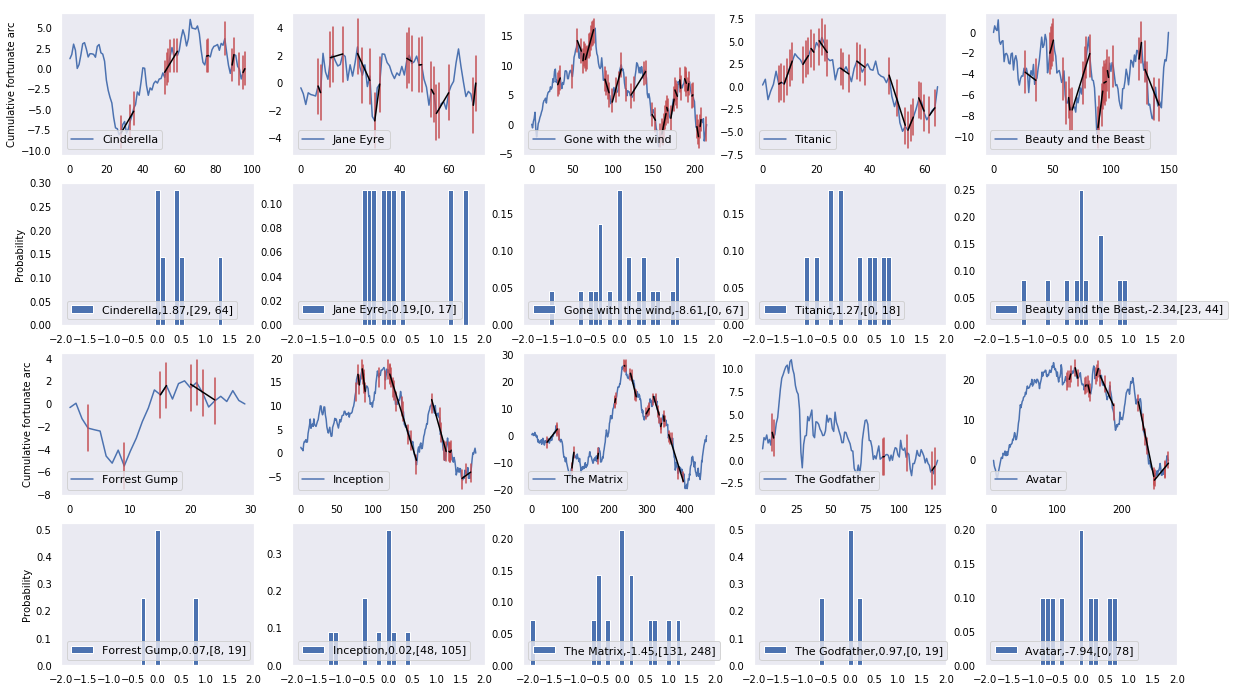

In [683]:
fig = plt.figure(figsize=(20,12))
ax=fig.add_subplot(4,5,1)
data=IMDB1[IMDB1['tconst']=='tt1661199']
curve(data,'Cinderella')
plt.ylabel('Cumulative fortunate arc',fontsize=10)
ax=fig.add_subplot(4,5,2)
data=IMDB1[IMDB1['tconst']=='tt1229822']
curve(data,'Jane Eyre')
ax=fig.add_subplot(4,5,3)
data=IMDB1[IMDB1['tconst']=='tt0031381']
curve(data,'Gone with the wind')
ax=fig.add_subplot(4,5,4)
data=IMDB1[IMDB1['tconst']=='tt0120338']
curve(data,'Titanic')
ax=fig.add_subplot(4,5,5)
data=IMDB1[IMDB1['tconst']=='tt2771200']
curve(data,'Beauty and the Beast')
ax=fig.add_subplot(4,5,6)
data=IMDB1[IMDB1['tconst']=='tt1661199']
hist(data,'Cinderella')
plt.ylabel('Probability',fontsize=10)
ax=fig.add_subplot(4,5,7)
data=IMDB1[IMDB1['tconst']=='tt1229822']
hist(data,'Jane Eyre')
ax=fig.add_subplot(4,5,8)
data=IMDB1[IMDB1['tconst']=='tt0031381']
hist(data,'Gone with the wind')
ax=fig.add_subplot(4,5,9)
data=IMDB1[IMDB1['tconst']=='tt0120338']
hist(data,'Titanic')
ax=fig.add_subplot(4,5,10)
data=IMDB1[IMDB1['tconst']=='tt2771200']
hist(data,'Beauty and the Beast')

ax=fig.add_subplot(4,5,11)
data=IMDB1[IMDB1['tconst']=='tt0109830']
plt.ylabel('Cumulative fortunate arc',fontsize=10)
curve(data,'Forrest Gump')
ax=fig.add_subplot(4,5,12)
data=IMDB1[IMDB1['tconst']=='tt1375666']
curve(data,'Inception')
ax=fig.add_subplot(4,5,13)
data=IMDB1[IMDB1['tconst']=='tt0133093']
curve(data,'The Matrix')
ax=fig.add_subplot(4,5,14)
data=IMDB1[IMDB1['tconst']=='tt0068646']
curve(data,'The Godfather')
ax=fig.add_subplot(4,5,15)
data=IMDB1[IMDB1['tconst']=='tt0499549']
curve(data,'Avatar')
ax=fig.add_subplot(4,5,16)
data=IMDB1[IMDB1['tconst']=='tt0109830']
hist(data,'Forrest Gump')
plt.ylabel('Probability',fontsize=10)
ax=fig.add_subplot(4,5,17)
data=IMDB1[IMDB1['tconst']=='tt1375666']
hist(data,'Inception')
ax=fig.add_subplot(4,5,18)
data=IMDB1[IMDB1['tconst']=='tt0133093']
hist(data,'The Matrix')
ax=fig.add_subplot(4,5,19)
data=IMDB1[IMDB1['tconst']=='tt0068646']
hist(data,'The Godfather')
ax=fig.add_subplot(4,5,20)
data=IMDB1[IMDB1['tconst']=='tt0499549']
hist(data,'Avatar')

plt.show()

In [1036]:
def curve(data,n):
    cum_e = data['cum_e'].values[0]
    tp = data['tp'].values[0]
#     b = data['tp_c'].values[0]
    if np.argmax(cum_e)<np.argmin(cum_e):
        nodes=np.array([[0,cum_e[0]],[np.argmax(cum_e),max(cum_e)],[np.argmin(cum_e),min(cum_e)],[len(cum_e),cum_e[-1]]])
    else:
        nodes=np.array([[0,cum_e[0]],[np.argmin(cum_e),min(cum_e)],[np.argmax(cum_e),max(cum_e)],[len(cum_e),cum_e[-1]]])
    curve = bezier.Curve(np.array(nodes).T, degree=2)
    curve.plot(num_pts=256,ax=ax)
    for x,y in nodes:
        plt.plot(x,y,'bo',color='black')
    plt.plot(range(len(cum_e)),cum_e,label=n)
#     plt.legend(loc='lower left',frameon=False)
    for i in tp:
        plt.plot([i,i],[cum_e[i]-2,cum_e[i]+2],color='r')   

    plt.title(n,fontsize=15)
#     for i in b:
#         if len(i)>1:
#             x=[j[0] for j in i]
#             y=[j[1] for j in i]
#             poly = np.polyfit(x,y,deg=1)
#             z = np.polyval(poly, x)
# #             plt.annotate("%s" % poly, xy=(x[-1]-1,y[-1]-1))
#             plt.plot(x, z,color='black')

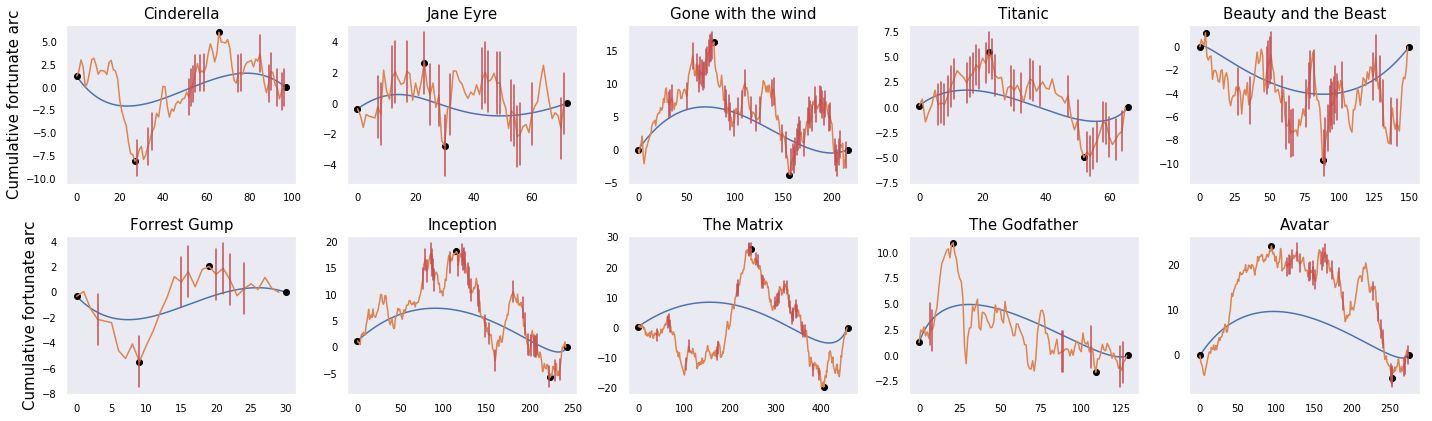

In [1037]:
fig = plt.figure(figsize=(20,6))
ax=fig.add_subplot(2,5,1)
data=IMDB[IMDB['tconst']=='tt1661199']
curve(data,'Cinderella')
plt.ylabel('Cumulative fortunate arc',fontsize=15)
ax=fig.add_subplot(2,5,2)
data=IMDB[IMDB['tconst']=='tt1229822']
curve(data,'Jane Eyre')
ax=fig.add_subplot(2,5,3)
data=IMDB[IMDB['tconst']=='tt0031381']
curve(data,'Gone with the wind')
ax=fig.add_subplot(2,5,4)
data=IMDB[IMDB['tconst']=='tt0120338']
curve(data,'Titanic')
ax=fig.add_subplot(2,5,5)
data=IMDB[IMDB['tconst']=='tt2771200']
curve(data,'Beauty and the Beast')

ax=fig.add_subplot(2,5,6)
data=IMDB[IMDB['tconst']=='tt0109830']
plt.ylabel('Cumulative fortunate arc',fontsize=15)
curve(data,'Forrest Gump')
ax=fig.add_subplot(2,5,7)
data=IMDB[IMDB['tconst']=='tt1375666']
curve(data,'Inception')
ax=fig.add_subplot(2,5,8)
data=IMDB[IMDB['tconst']=='tt0133093']
curve(data,'The Matrix')
ax=fig.add_subplot(2,5,9)
data=IMDB[IMDB['tconst']=='tt0068646']
curve(data,'The Godfather')
ax=fig.add_subplot(2,5,10)
data=IMDB[IMDB['tconst']=='tt0499549']
curve(data,'Avatar')
plt.tight_layout()
plt.show()

In [92]:
IMDB['cum_e']=IMDB['cum_e'].apply(lambda x:normalization(x))
IMDB['norm_len']=IMDB['len'].apply(lambda x:normalization(range(int(x))))

In [1045]:
def curve1(data,n):
    cum_e = data['cum_e'].values[0]
    tp = data['tp'].values[0]
    l = data['norm_len'].values[0]
#     b = data['tp_c'].values[0]
    if np.argmax(cum_e)<np.argmin(cum_e):
        nodes=np.array([[l[0],cum_e[0]],[l[np.argmax(cum_e)],max(cum_e)],[l[np.argmin(cum_e)],min(cum_e)],[l[len(cum_e)-1],cum_e[-1]]])
    else:
        nodes=np.array([[l[0],cum_e[0]],[l[np.argmin(cum_e)],min(cum_e)],[l[np.argmax(cum_e)],max(cum_e)],[l[len(cum_e)-1],cum_e[-1]]])
    curve = bezier.Curve(np.array(nodes).T, degree=2)
    curve.plot(num_pts=256,ax=ax)
    for x,y in nodes:
        plt.plot(x,y,'bo',color='black')
    plt.plot(l,cum_e,label=n)
#     plt.legend(loc='lower left',frameon=False)
#     for i in tp:
#         plt.plot([i,i],[cum_e[i]-2,cum_e[i]+2],color='r')   

    plt.title(n,fontsize=15)

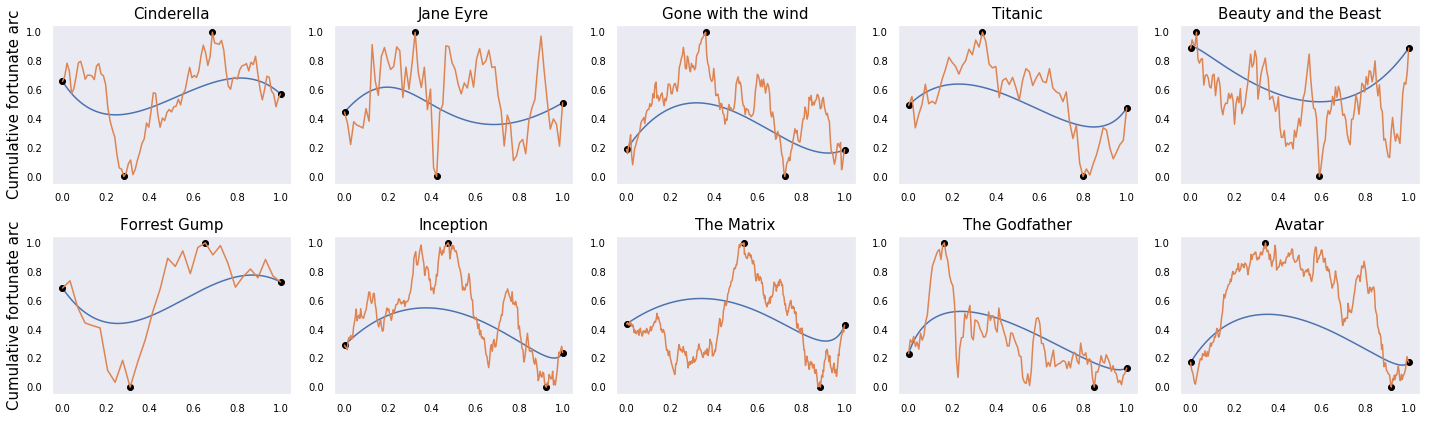

In [1046]:
fig = plt.figure(figsize=(20,6))
ax=fig.add_subplot(2,5,1)
data=IMDB[IMDB['tconst']=='tt1661199']
curve1(data,'Cinderella')
plt.ylabel('Cumulative fortunate arc',fontsize=15)
ax=fig.add_subplot(2,5,2)
data=IMDB[IMDB['tconst']=='tt1229822']
curve1(data,'Jane Eyre')
ax=fig.add_subplot(2,5,3)
data=IMDB[IMDB['tconst']=='tt0031381']
curve1(data,'Gone with the wind')
ax=fig.add_subplot(2,5,4)
data=IMDB[IMDB['tconst']=='tt0120338']
curve1(data,'Titanic')
ax=fig.add_subplot(2,5,5)
data=IMDB[IMDB['tconst']=='tt2771200']
curve1(data,'Beauty and the Beast')

ax=fig.add_subplot(2,5,6)
data=IMDB[IMDB['tconst']=='tt0109830']
plt.ylabel('Cumulative fortunate arc',fontsize=15)
curve1(data,'Forrest Gump')
ax=fig.add_subplot(2,5,7)
data=IMDB[IMDB['tconst']=='tt1375666']
curve1(data,'Inception')
ax=fig.add_subplot(2,5,8)
data=IMDB[IMDB['tconst']=='tt0133093']
curve1(data,'The Matrix')
ax=fig.add_subplot(2,5,9)
data=IMDB[IMDB['tconst']=='tt0068646']
curve1(data,'The Godfather')
ax=fig.add_subplot(2,5,10)
data=IMDB[IMDB['tconst']=='tt0499549']
curve1(data,'Avatar')
plt.tight_layout()
plt.show()

In [101]:
IMDB['shape']=IMDB['cum_e'].apply(lambda x: 'l_h' if np.argmax(x)>np.argmin(x) else 'h_l')

In [63]:
len(IMDB[IMDB['shape']=='h_l'])/len(IMDB)

0.5703770467177407

In [58]:
male=IMDB[(IMDB['lead_gender']=='male')]
female=IMDB[(IMDB['lead_gender']=='female')]

In [59]:
len(male[male['shape']=='h_l'])/len(male)

0.5655099894847528

In [61]:
len(female[female['shape']=='h_l'])/len(female)

0.5825446898002103

In [1079]:
def curve2(data):
    cum_e = data['cum_e'].values[0]
    tp = data['tp'].values[0]
    l = data['norm_len'].values[0]
#     b = data['tp_c'].values[0]
    if np.argmax(cum_e)<np.argmin(cum_e):
        nodes=np.array([[l[0],cum_e[0]],[l[np.argmax(cum_e)],max(cum_e)],[l[np.argmin(cum_e)],min(cum_e)],[l[len(cum_e)-1],cum_e[-1]]])
    else:
        nodes=np.array([[l[0],cum_e[0]],[l[np.argmin(cum_e)],min(cum_e)],[l[np.argmax(cum_e)],max(cum_e)],[l[len(cum_e)-1],cum_e[-1]]])
    curve = bezier.Curve(np.array(nodes).T, degree=2)
    curve.plot(num_pts=256,ax=ax,color='blue',alpha=0.01)
#     for x,y in nodes:
#         plt.plot(x,y,'bo',color='black')
#     plt.plot(l,cum_e)

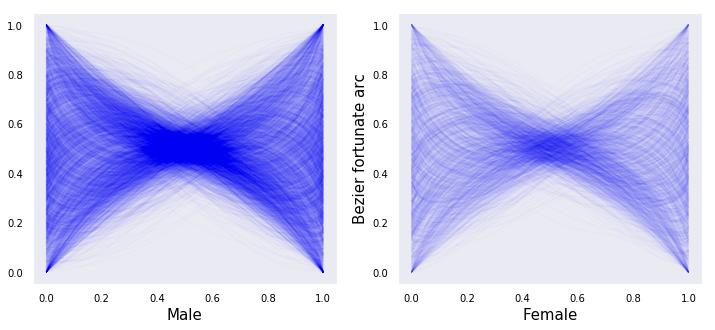

In [1060]:
fig = plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,2,1)
for i in male['tconst'].values:
    data=IMDB[IMDB['tconst']==i]
    curve2(data)
plt.xlabel('Male',fontsize=15)
ax=fig.add_subplot(1,2,2)
for i in female['tconst'].values:
    data=IMDB[IMDB['tconst']==i]
    curve2(data)
plt.xlabel('Female',fontsize=15)
plt.ylabel('Bezier fortunate arc',fontsize=15)
plt.show()

In [94]:
import copy
IMDB2 = copy.deepcopy(IMDB)
IMDB2['g_len']=IMDB2['genres'].apply(lambda x: len(x.split(',')))
df=IMDB2[IMDB2['g_len']==1]
df1=IMDB2[IMDB2['g_len']==2]
df1_1=copy.deepcopy(df1)
df1['genres']=df1['genres'].apply(lambda x: x.split(',')[0])
df1_1['genres']=df1_1['genres'].apply(lambda x: x.split(',')[1])
df2=IMDB2[IMDB2['g_len']==3]
df2_1=copy.deepcopy(df2)
df2_2=copy.deepcopy(df2)
df2['genres']=df2['genres'].apply(lambda x: x.split(',')[0])
df2_1['genres']=df2_1['genres'].apply(lambda x: x.split(',')[1])
df2_2['genres']=df2_2['genres'].apply(lambda x: x.split(',')[2])
data=pd.DataFrame()
data=data.append(df)
data=data.append(df1)
data=data.append(df1_1)
data=data.append(df2)
data=data.append(df2_1)
data=data.append(df2_2)
data=data.reset_index(drop=True)
data=data[data['genres']!='\\N']

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [65]:
d,d1= zip(*sorted(Counter(data['genres'].values).items(),key=lambda i:i[1],reverse=True))

In [66]:
len(d)

23

In [71]:
for i in d:
    genre=data[data['genres']==i]
    print(i,len(genre[genre['shape']=='h_l'])/len(genre))

Drama 0.5704498063747393
Comedy 0.6055992141453831
Horror 0.5159781761496492
Romance 0.56875
Action 0.6040160642570281
Thriller 0.5460809646856158
Crime 0.5696564885496184
Adventure 0.6215621562156216
Mystery 0.5624012638230648
Sci-Fi 0.5605536332179931
Fantasy 0.5803757828810021
Family 0.6957928802588996
Biography 0.6096491228070176
Animation 0.6829268292682927
Music 0.5584415584415584
Musical 0.644927536231884
History 0.5294117647058824
War 0.5445544554455446
Sport 0.6153846153846154
Film-Noir 0.5058823529411764
Western 0.5185185185185185
Adult 0.52
Documentary 0.3333333333333333


In [90]:
def curve2(data):
    cum_e = data['cum_e'].values[0]
    tp = data['tp'].values[0]
    l = data['norm_len'].values[0]
#     b = data['tp_c'].values[0]
    if np.argmax(cum_e)<np.argmin(cum_e):
        nodes=np.array([[l[0],cum_e[0]],[l[np.argmax(cum_e)],max(cum_e)],[l[np.argmin(cum_e)],min(cum_e)],[l[len(cum_e)-1],cum_e[-1]]])
    else:
        nodes=np.array([[l[0],cum_e[0]],[l[np.argmin(cum_e)],min(cum_e)],[l[np.argmax(cum_e)],max(cum_e)],[l[len(cum_e)-1],cum_e[-1]]])
    curve = bezier.Curve(np.array(nodes).T, degree=2)
    curve.plot(num_pts=256,ax=ax,color='blue',alpha=0.1)
#     for x,y in nodes:
#         plt.plot(x,y,'bo',color='black')
#     plt.plot(l,cum_e)

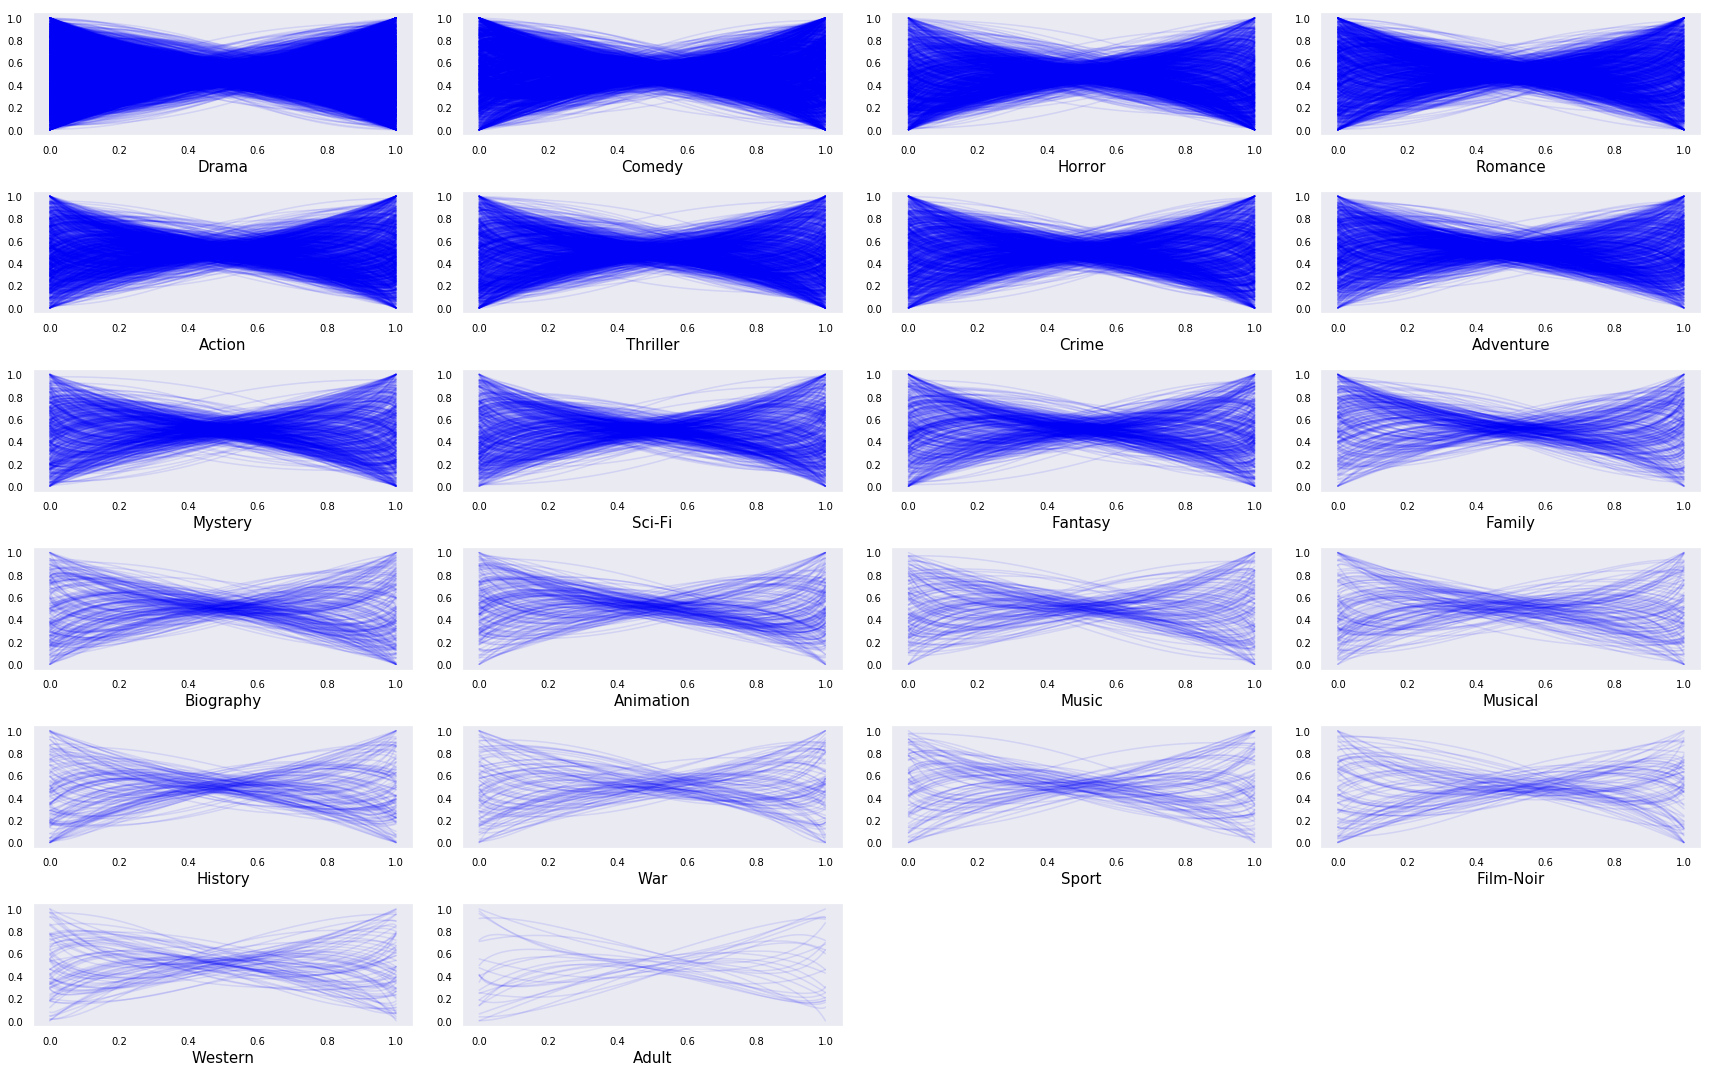

In [1097]:
fig = plt.figure(figsize=(24,15))
l=d
for i in range(len(l)):
    ax=fig.add_subplot(6,4,i+1)
    genre=data[data['genres']==l[i]]
    for j in genre['tconst'].values:
        b=genre[genre['tconst']==j]
        curve2(b)
    plt.xlabel(l[i],fontsize=15)
# plt.ylabel('Bezier fortunate arc',fontsize=15)
plt.tight_layout()
plt.show()

In [72]:
IMDB2['votes']=IMDB2['numVotes'].apply(lambda x: 10**int(len(str(int(x)))))

In [73]:
d,d1= zip(*sorted(Counter(IMDB2['votes'].values).items(),key=lambda i:i[0]))

In [74]:
len(d)

7

In [75]:
d

(10, 100, 1000, 10000, 100000, 1000000, 10000000)

In [82]:
d1

(80, 546, 1079, 1760, 2057, 1117, 18)

In [81]:
for i in d:
    genre=IMDB2[IMDB2['votes']==i]
    print(i,len(genre[genre['shape']=='h_l'])/len(genre))

10 0.5875
100 0.5384615384615384
1000 0.5421686746987951
10000 0.5465909090909091
100000 0.5896937287311619
1000000 0.6114592658907789
10000000 0.7222222222222222


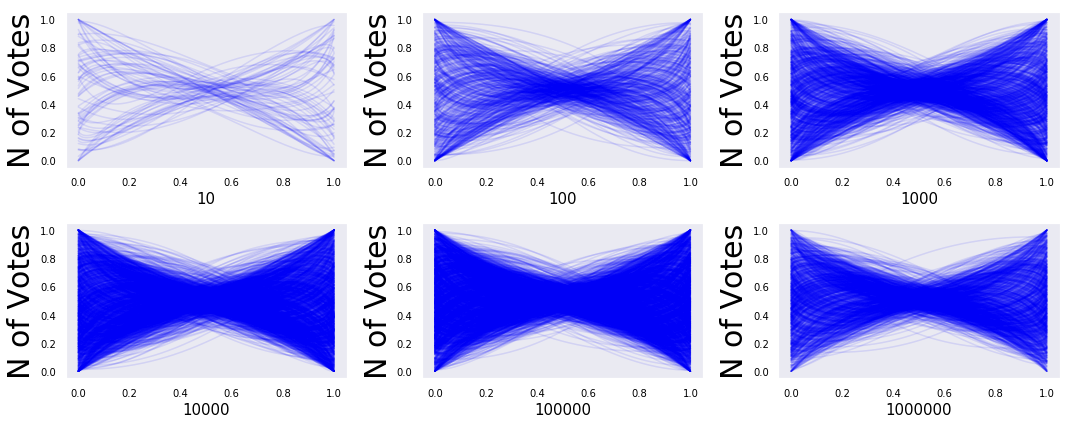

In [1120]:
fig = plt.figure(figsize=(15,6))
l=d
for i in range(len(l)):
    ax=fig.add_subplot(2,4,i+1)
    genre=IMDB2[IMDB2['votes']==l[i]]
    for j in genre['tconst'].values:
        b=genre[genre['tconst']==j]
        curve2(b)
    plt.xlabel(l[i],fontsize=15)
    plt.ylabel('N of Votes')
# plt.ylabel('Bezier fortunate arc',fontsize=15)
plt.tight_layout()
plt.show()

In [96]:
IMDB2['rating']=IMDB2['averageRating'].apply(lambda x: round(x))

In [97]:
d,d1= zip(*sorted(Counter(IMDB2['rating'].values).items(),key=lambda i:i[0]))

In [98]:
len(d)

10

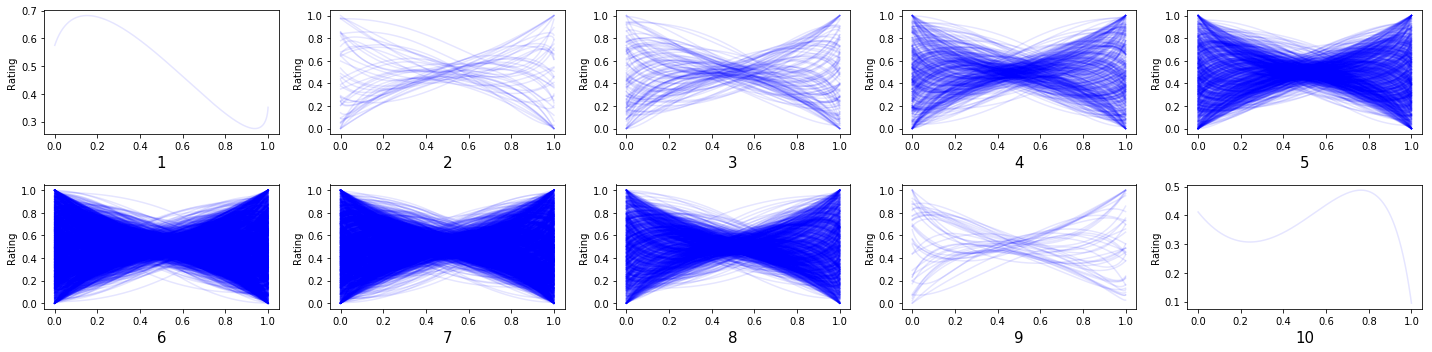

In [99]:
fig = plt.figure(figsize=(20,5))
l=d
for i in range(len(l)):
    ax=fig.add_subplot(2,5,i+1)
    genre=IMDB2[IMDB2['rating']==l[i]]
    for j in genre['tconst'].values:
        b=genre[genre['tconst']==j]
        curve2(b)
    plt.xlabel(l[i],fontsize=15)
    plt.ylabel('Rating')
# plt.ylabel('Bezier fortunate arc',fontsize=15)
plt.tight_layout()
plt.show()

In [87]:
d

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

In [88]:
d1

(1, 44, 117, 397, 802, 2166, 2054, 1034, 41, 1)

In [86]:
for i in d:
    genre=IMDB2[IMDB2['rating']==i]
    print(i,len(genre[genre['shape']=='h_l'])/len(genre))

1 1.0
2 0.4772727272727273
3 0.5641025641025641
4 0.4987405541561713
5 0.5361596009975063
6 0.579870729455217
7 0.5886075949367089
8 0.5715667311411993
9 0.6097560975609756
10 0.0


In [104]:
IMDB['stage']=IMDB['cum_e'].apply(lambda x: sorted([0,np.argmin(x),np.argmin(x),len(x)]))

In [105]:
male=IMDB[(IMDB['lead_gender']=='male')]
female=IMDB[(IMDB['lead_gender']=='female')]

In [107]:
male_words=[]
male_words1=[]
male_words2=[]
male_words3=[]
for i in male['tconst'].values:
    try:
        with open ('./short_movie/'+str(i)+'.txt') as f:
            data=f.readlines()
        stage=IMDB[IMDB['tconst']==i]['stage'].values[0]
        w=[]
        a=[w.extend([j.split('_')[0] for j in i.split('\t')]) for i in data]
        male_words.extend(w)
        w=[]
        a=[w.extend([j.split('_')[0] for j in i.split('\t')]) for i in data if data.index(i)<stage[1]]
        male_words1.extend(w)
        w=[]
        a=[w.extend([j.split('_')[0] for j in i.split('\t')]) for i in data if stage[1]<=data.index(i)<=stage[2]]
        male_words2.extend(w)
        w=[]
        a=[w.extend([j.split('_')[0] for j in i.split('\t')]) for i in data if stage[2]<data.index(i)]
        male_words3.extend(w)
    except Exception as e:
        print(e)
        pass

In [108]:
len(male_words)

4870281

In [109]:
diction = {}
cnt = Counter(male_words)
for word, freq in cnt.items():
    diction[word] = freq
diction_1 = {}
cnt = Counter(male_words1)
for word, freq in cnt.items():
    diction_1[word] = freq
diction_2 = {}
cnt = Counter(male_words2)
for word, freq in cnt.items():
    diction_2[word] = freq
diction_3 = {}
cnt = Counter(male_words3)
for word, freq in cnt.items():
    diction_3[word] = freq

In [110]:
diction['marry']

715

In [111]:
diction_1['marry']

381

In [112]:
diction_2['marry']

12

In [113]:
diction_3['marry']

322

In [114]:
female_words=[]
female_words1=[]
female_words2=[]
female_words3=[]
for i in female['tconst'].values:
    try:
        with open ('./short_movie/'+str(i)+'.txt') as f:
            data=f.readlines()
        stage=IMDB[IMDB['tconst']==i]['stage'].values[0]
        w=[]
        a=[w.extend([j.split('_')[0] for j in i.split('\t')]) for i in data]
        female_words.extend(w)
        w=[]
        a=[w.extend([j.split('_')[0] for j in i.split('\t')]) for i in data if data.index(i)<stage[1]]
        female_words1.extend(w)
        w=[]
        a=[w.extend([j.split('_')[0] for j in i.split('\t')]) for i in data if stage[1]<=data.index(i)<=stage[2]]
        female_words2.extend(w)
        w=[]
        a=[w.extend([j.split('_')[0] for j in i.split('\t')]) for i in data if stage[2]<data.index(i)]
        female_words3.extend(w)
    except Exception as e:
        print(e)
        pass

In [1172]:
diction1 = {}
cnt = Counter(female_words)
for word, freq in cnt.items():
    diction1[word] = freq

In [121]:
diction1 = {}
cnt = Counter(female_words)
for word, freq in cnt.items():
    diction1[word] = freq
diction1_1 = {}
cnt = Counter(female_words1)
for word, freq in cnt.items():
    diction1_1[word] = freq
diction1_2 = {}
cnt = Counter(female_words2)
for word, freq in cnt.items():
    diction1_2[word] = freq
diction1_3 = {}
cnt = Counter(female_words3)
for word, freq in cnt.items():
    diction1_3[word] = freq

In [122]:
len(female_words)

1885809

In [123]:
diction1['marry']

411

In [124]:
diction1_1['marry']

208

In [125]:
diction1_2['marry']

10

In [120]:
diction1_3['marry']

193

In [126]:
words=pd.read_csv('./words.csv')

In [127]:
len(words)

10222

In [131]:
words['male']=words['word'].apply(lambda x: diction[x] if x in diction else np.nan)
words['female']=words['word'].apply(lambda x: diction1[x] if x in diction1 else np.nan)
words['male1']=words['word'].apply(lambda x: diction_1[x] if x in diction_1 else np.nan)
words['female1']=words['word'].apply(lambda x: diction1_1[x] if x in diction1_1 else np.nan)
words['male2']=words['word'].apply(lambda x: diction_2[x] if x in diction_2 else np.nan)
words['female2']=words['word'].apply(lambda x: diction1_2[x] if x in diction1_2 else np.nan)
words['male3']=words['word'].apply(lambda x: diction_3[x] if x in diction_3 else np.nan)
words['female3']=words['word'].apply(lambda x: diction1_3[x] if x in diction1_3 else np.nan)

In [132]:
words.head()

,word,happiness_average,male,female,male_r,female_r,male1,female1,male2,female2,male3,female3
0,laughter,8.50,70.0,32.0,0.014721,0.016824,16.0,16.0,1.0,1.0,37.0,15.0
1,happiness,8.44,165.0,73.0,0.034700,0.038381,37.0,37.0,1.0,1.0,96.0,35.0
2,love,8.42,3550.0,1825.0,0.746583,0.959516,869.0,869.0,52.0,33.0,1875.0,923.0
3,happy,8.30,973.0,495.0,0.204627,0.260252,201.0,201.0,6.0,5.0,570.0,289.0
4,laughed,8.26,19.0,12.0,0.003996,0.006309,9.0,9.0,NaN,NaN,7.0,3.0


In [133]:
words['male_r']=words['male'].apply(lambda x: x/len(male))
words['female_r']=words['female'].apply(lambda x: x/len(female))
words['male_r1']=words['male1'].apply(lambda x: x/len(male))
words['female_r1']=words['female1'].apply(lambda x: x/len(female))
words['male_r2']=words['male2'].apply(lambda x: x/len(male))
words['female_r2']=words['female2'].apply(lambda x: x/len(female))
words['male_r3']=words['male3'].apply(lambda x: x/len(male))
words['female_r3']=words['female3'].apply(lambda x: x/len(female))

In [134]:
words['distance']=abs(words['male_r']-words['female_r'])
words['distance1']=abs(words['male_r1']-words['female_r1'])
words['distance2']=abs(words['male_r2']-words['female_r2'])
words['distance3']=abs(words['male_r3']-words['female_r3'])

In [143]:
w=words[(words['happiness_average']>6.5)|(words['happiness_average']<3.5)].sort_values(by=['distance'],ascending=False)
w1=words[(words['happiness_average']>6.5)|(words['happiness_average']<3.5)].sort_values(by=['distance1'],ascending=False)
w2=words[(words['happiness_average']>6.5)|(words['happiness_average']<3.5)].sort_values(by=['distance2'],ascending=False)
w3=words[(words['happiness_average']>6.5)|(words['happiness_average']<3.5)].sort_values(by=['distance3'],ascending=False)

In [156]:
words[words['word']=='marriage']

,word,happiness_average,male,female,male_r,female_r,male1,female1,male2,female2,male3,female3,male_r1,female_r1,male_r2,female_r2,male_r3,female_r3,distance,distance1,distance2,distance3
960,marriage,6.7,826.0,453.0,0.173712,0.23817,254.0,254.0,38.0,22.0,324.0,177.0,0.053417,0.133544,0.007992,0.011567,0.068139,0.09306,0.064458,0.080126,0.003575,0.024921


In [147]:
w1[:10]

,word,happiness_average,male,female,male_r,female_r,male1,female1,male2,female2,male3,female3,male_r1,female_r1,male_r2,female_r2,male_r3,female_r3,distance,distance1,distance2,distance3
455,home,7.14,6783.0,3192.0,1.426498,1.678233,1779.0,1779.0,71.0,31.0,2986.0,1382.0,0.374132,0.935331,0.014932,0.016299,0.627971,0.726604,0.251735,0.561199,0.001367,0.098633
107,mother,7.68,3538.0,2375.0,0.744059,1.248686,1354.0,1354.0,72.0,43.0,1493.0,978.0,0.284753,0.711882,0.015142,0.022608,0.313985,0.514196,0.504627,0.427129,0.007466,0.200210
531,father,7.06,5614.0,2366.0,1.180652,1.243954,1350.0,1350.0,139.0,55.0,2184.0,961.0,0.283912,0.709779,0.029232,0.028917,0.459306,0.505258,0.063302,0.425868,0.000315,0.045952
916,car,6.72,6626.0,2304.0,1.393481,1.211356,1276.0,1276.0,86.0,45.0,2923.0,983.0,0.268349,0.670873,0.018086,0.023659,0.614721,0.516824,0.182124,0.402524,0.005573,0.097897
9523,no,3.48,5603.0,2161.0,1.178339,1.136172,1159.0,1159.0,83.0,23.0,2581.0,979.0,0.243743,0.609359,0.017455,0.012093,0.542797,0.514721,0.042166,0.365615,0.005363,0.028076
771,woman,6.84,3807.0,1772.0,0.800631,0.931651,1105.0,1105.0,64.0,36.0,1388.0,631.0,0.232387,0.580967,0.013460,0.018927,0.291903,0.331756,0.131020,0.348580,0.005468,0.039853
90,family,7.72,4191.0,1815.0,0.881388,0.954259,1075.0,1075.0,86.0,53.0,1730.0,687.0,0.226078,0.565195,0.018086,0.027865,0.363828,0.361199,0.072871,0.339117,0.009779,0.002629
788,first,6.82,4328.0,1772.0,0.910200,0.931651,955.0,955.0,48.0,17.0,1921.0,800.0,0.200841,0.502103,0.010095,0.008938,0.403996,0.420610,0.021451,0.301262,0.001157,0.016614
391,like,7.22,4603.0,1780.0,0.968034,0.935857,946.0,946.0,46.0,18.0,2191.0,816.0,0.198948,0.497371,0.009674,0.009464,0.460778,0.429022,0.032177,0.298423,0.000210,0.031756
293,life,7.32,4572.0,1865.0,0.961514,0.980547,923.0,923.0,98.0,54.0,2217.0,888.0,0.194111,0.485279,0.020610,0.028391,0.466246,0.466877,0.019033,0.291167,0.007781,0.000631


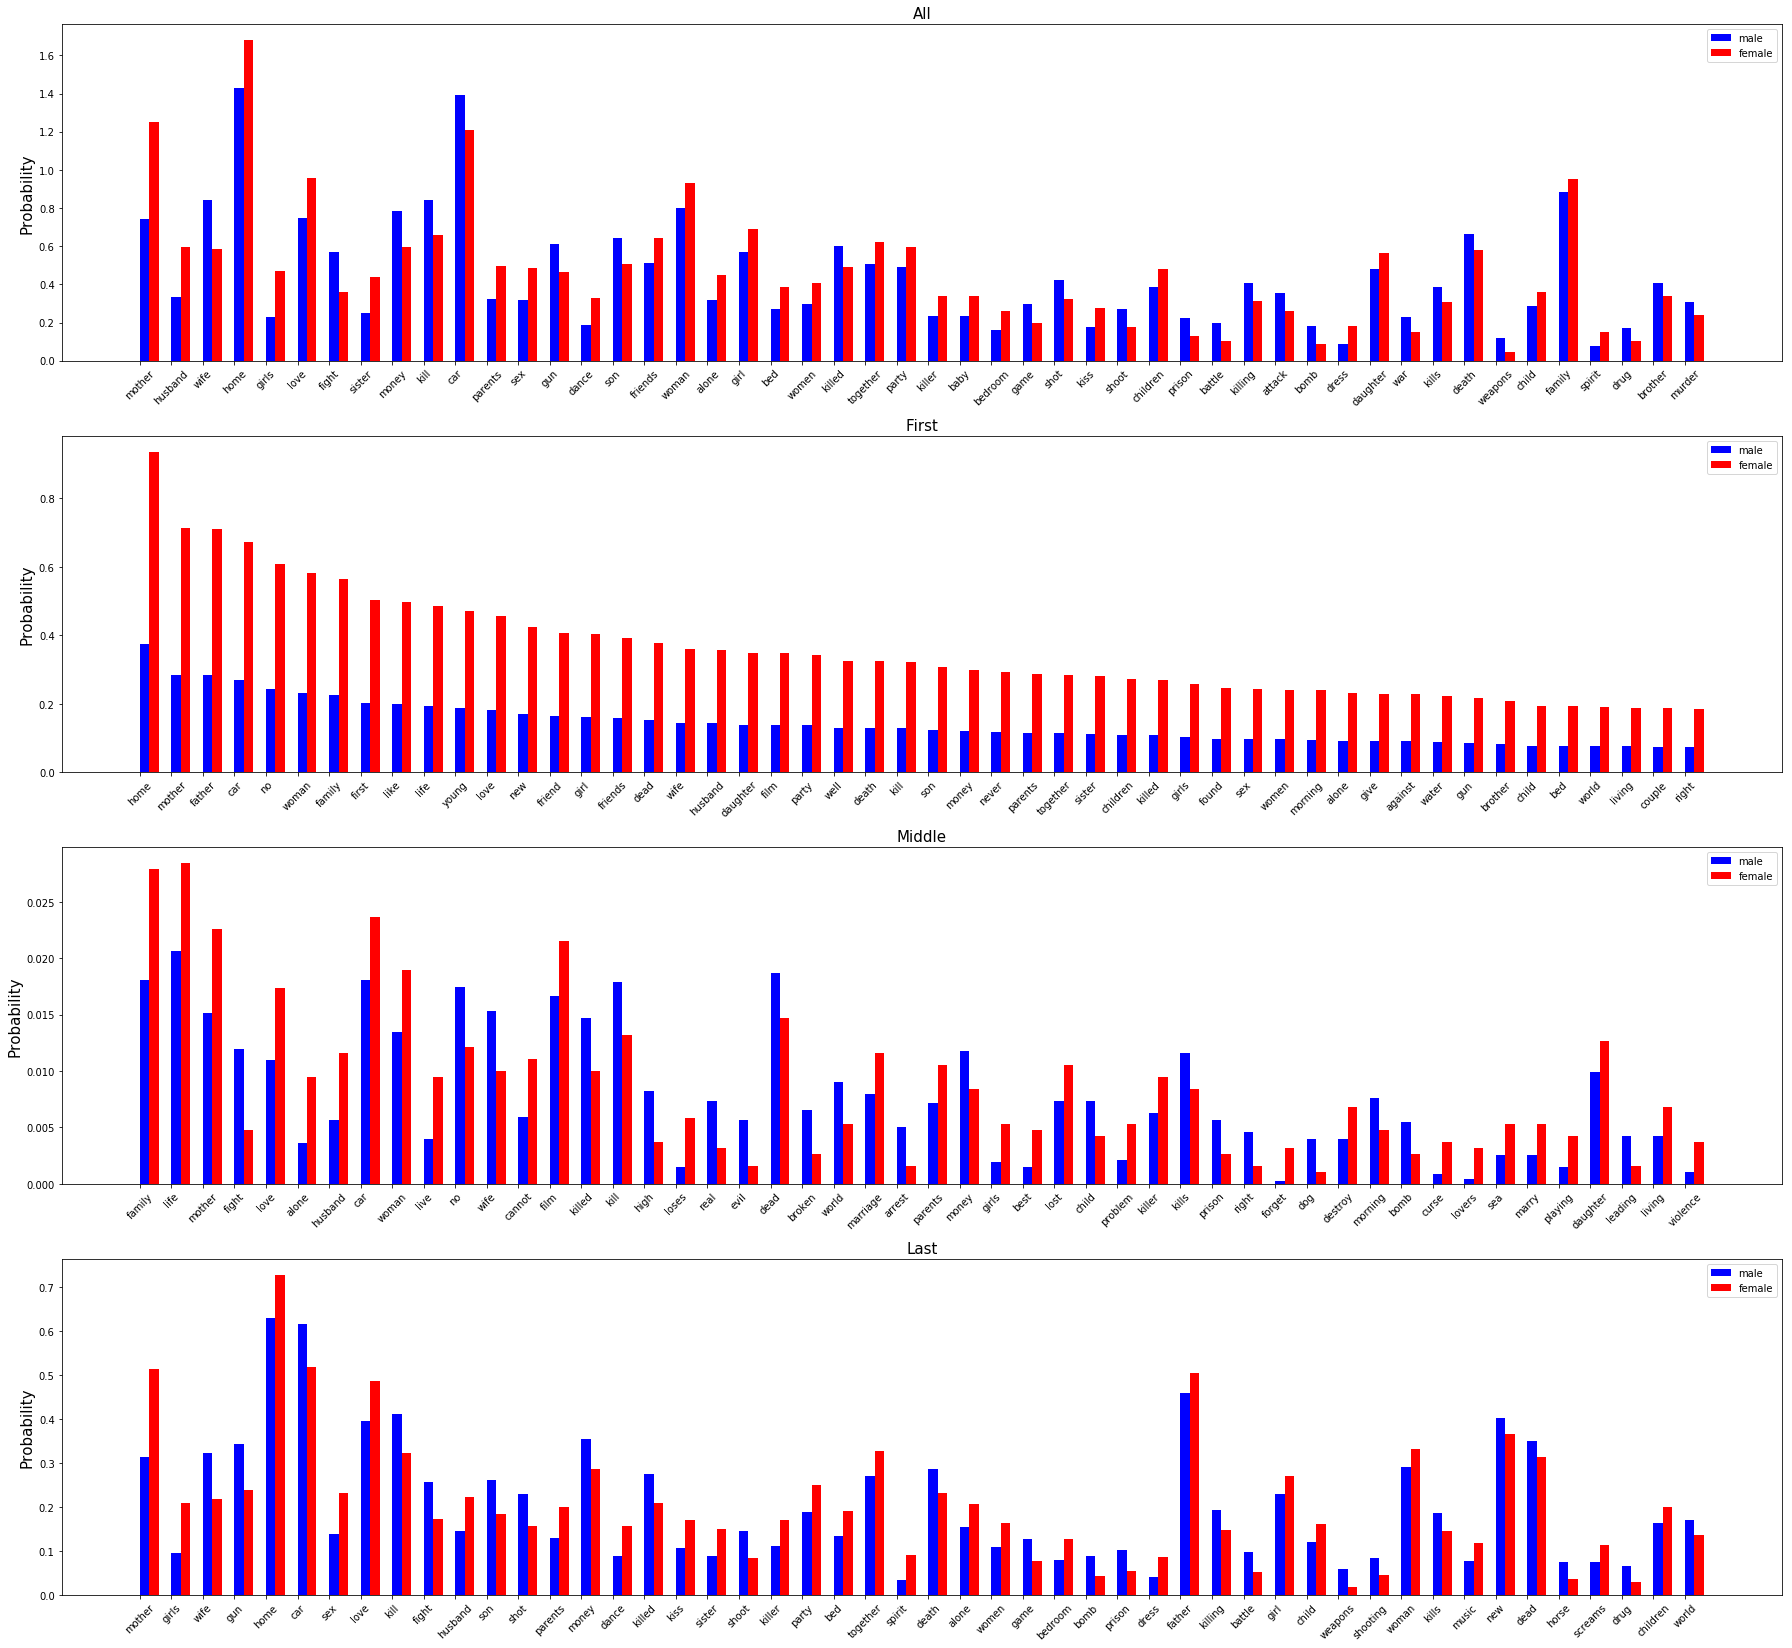

In [148]:
fig = plt.figure(figsize=(25,23))
ax=fig.add_subplot(4,1,1)
index=np.arange(50)
m=w['male_r'].values[:50]
f=w['female_r'].values[:50]
bar_width=0.3
plt.bar(index,m,bar_width,color='b',label='male')
plt.bar(index+bar_width,f,bar_width,color='r',label='female')
plt.ylabel('Probability',fontsize=15)
plt.xticks(rotation=45,fontsize=10)
plt.xticks([i-0.15 for i in index],[i for i in w['word'].values])
plt.title('All',fontsize=15)
plt.legend()

ax=fig.add_subplot(4,1,2)
index=np.arange(50)
m=w1['male_r1'].values[:50]
f=w1['female_r1'].values[:50]
bar_width=0.3
plt.bar(index,m,bar_width,color='b',label='male')
plt.bar(index+bar_width,f,bar_width,color='r',label='female')
plt.ylabel('Probability',fontsize=15)
plt.xticks(rotation=45,fontsize=10)
plt.xticks([i-0.15 for i in index],[i for i in w1['word'].values])
plt.title('First',fontsize=15)
plt.legend()

ax=fig.add_subplot(4,1,3)
index=np.arange(50)
m=w2['male_r2'].values[:50]
f=w2['female_r2'].values[:50]
bar_width=0.3
plt.bar(index,m,bar_width,color='b',label='male')
plt.bar(index+bar_width,f,bar_width,color='r',label='female')
plt.ylabel('Probability',fontsize=15)
plt.xticks(rotation=45,fontsize=10)
plt.xticks([i-0.15 for i in index],[i for i in w2['word'].values])
plt.title('Middle',fontsize=15)
plt.legend()

ax=fig.add_subplot(4,1,4)
index=np.arange(50)
m=w3['male_r3'].values[:50]
f=w3['female_r3'].values[:50]
bar_width=0.3
plt.bar(index,m,bar_width,color='b',label='male')
plt.bar(index+bar_width,f,bar_width,color='r',label='female')
plt.ylabel('Probability',fontsize=15)
plt.xticks(rotation=45,fontsize=10)
plt.xticks([i-0.15 for i in index],[i for i in w3['word'].values])
plt.title('Last',fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()

### biggest_happy_period

In [672]:
def biggest_p (x,y,z):
    try:
        a=[]
        for i in x:
            a.append(i[1][0]-i[0][0])
#         d=np.argmax(a)
#         b=sorted(a,reverse=False)
#         m=[]
#         for i in b:
#             if (b[0]-i)<2:
#                 ind=a.index(i)
#                 if (((z[x[ind][1][0]]-z[x[ind][0][0]])-(z[x[d][1][0]]-z[x[d][0][0]]))>=0)|\
#                     ((z[x[d][1][0]]-z[x[d][0][0]])-(z[x[ind][1][0]]-z[x[ind][0][0]])<2):
#                     l=len([i for i in y if x[ind][0][0]<=i<=x[ind][1][0]])
#                     m.append([l,x[ind][0][0],x[ind][1][0]])
#         return m[np.argmax([i[0] for i in m])][1:]
        m=np.argmax(a)
        return [x[m][0][0],x[m][1][0]]
    except Exception as e:
        return np.nan

In [673]:
IMDB1['biggest_p']=IMDB1.apply(lambda row:biggest_p(row.t_p,row.tp,row.cum_e),axis=1)

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [674]:
def happy_p(x,y,z):
    try:
        c=[i[0][0] for i in z if len(i)==1]
        a=x[0]
        b=x[1]
#         return len([i for i in y if (a<i<=b) & (i not in c)])
#         return len([i for i in y if a<i<b])/len(y)
        return len([i for i in y if a<i<=b])
    except:
        return np.nan
        pass

In [675]:
IMDB1['happy_p']=IMDB1.apply(lambda row: happy_p(row.biggest_p,row.tp,row.tp_c),axis=1)

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [676]:
IMDB1['happy_l']=IMDB1['biggest_p'].apply(lambda x: (x[1]-x[0]) if type(x)==list else np.nan)

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [677]:
IMDB1['real_exp']=IMDB1['happy_p']-IMDB['prob']*IMDB1['happy_l']

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [678]:
IMDB1=IMDB1.dropna(axis=0,how='any',subset=['real_exp'])

In [679]:
IMDB1[IMDB1['tconst']=='tt0068646']['biggest_p'] #Beauty and the Beast

1484    [0, 19]
Name: biggest_p, dtype: object

### all happy period

In [315]:
def all_p (x):
    try:
        a=[]
        for i in x:
            a.append([i[0][0],i[1][0]])
        return a
    except Exception as e:
        return np.nan

In [316]:
IMDB1['all_p']=IMDB1['t_p'].apply(lambda x:all_p(x))

In [317]:
def all_happy_p(x,y):
    try:
        c=[]
        for i in x:
            a=i[0]
            b=i[1]
            c.append(len([j for j in y if a<j<=b]))
        return np.sum(c)
    except Exception as e:
#         print(e)
        return np.nan
        pass

In [329]:
IMDB1['happy_p']=IMDB1.apply(lambda row: all_happy_p(row.all_p,row.tp),axis=1)

In [330]:
IMDB1['happy_l']=IMDB1['all_p'].apply(lambda x: np.sum([i[1]-i[0] for i in x]) if type(x)==list else np.nan)

In [331]:
IMDB1['real']=IMDB1['happy_p']
IMDB1['exp']=IMDB1['prob']*IMDB1['happy_l']

In [321]:
IMDB1['real_exp']=IMDB1['happy_p']-IMDB['prob']*IMDB1['happy_l']

In [322]:
IMDB1=IMDB1.dropna(axis=0,how='any',subset=['real_exp'])

In [323]:
len(IMDB1)

6081

### lowest

In [791]:
IMDB1['lowest']=IMDB1['cum_e'].apply(lambda x: np.argmin(x))

In [805]:
def lowest(x,y,z):
    try:
        a=len([i for i in y if i<=x])/len([i for i in y if i>x])
        b=(x+1)/(z-x-1)
        return [a,b]
    except:
        np.nan

In [806]:
IMDB1['b_a']=IMDB1.apply(lambda row: lowest(row.lowest,row.tp,row.len),axis=1)

In [810]:
IMDB1=IMDB1.dropna(axis=0,how='any',subset=['lowest'])

In [811]:
male=IMDB1[(IMDB1['lead_gender']=='male')]
female=IMDB1[(IMDB1['lead_gender']=='female')]

In [815]:
real=[i[0] for i in male['b_a'].values if type(i)==list]
exp=[i[1] for i in male['b_a'].values if type(i)==list]

In [816]:
real_1=[i[0] for i in female['b_a'].values if type(i)==list]
exp_1=[i[1] for i in female['b_a'].values if type(i)==list]

In [812]:
len(male),len(female)

(4337, 1750)

In [823]:
np.mean(real)

1.7671028162602982

In [824]:
np.mean(exp)

3.013385720015376

In [825]:
np.mean(real_1)

2.1118585683103164

In [826]:
np.mean(exp_1)

2.9416661214147664

In [817]:
import numpy as np
from scipy import stats
from scipy.stats import chisquare        
list_observe=real_1
list_expect=exp_1
 
chisquare(f_obs=list_observe, f_exp=list_expect)

Power_divergenceResult(statistic=6606.031479680416, pvalue=1.547475517786327e-233)

In [820]:
list_observe=real_1
list_expect=exp_1
 
chisquare(f_obs=list_observe, f_exp=list_expect)

Power_divergenceResult(statistic=2964.4428068519896, pvalue=1.533029061186642e-135)

### highest

In [774]:
IMDB1=IMDB1.dropna(axis=0,how='any',subset=['trend'])

In [775]:
len(IMDB1)

6087

In [1305]:
# IMDB1=IMDB1[IMDB1['tp_l']>5]

In [414]:
IMDB1[IMDB1['tconst']=='tt1661199']['real_exp'] #cinderella

7381   -1.28866
Name: real_exp, dtype: float64

In [415]:
IMDB1[IMDB1['tconst']=='tt0120338']['real_exp'] #Titanic

3399    4.090909
Name: real_exp, dtype: float64

In [412]:
IMDB1[IMDB1['tconst']=='tt0109830']['real_exp']#Forrest Gump

3097    0.266667
Name: real_exp, dtype: float64

In [429]:
IMDB1[IMDB1['tconst']=='tt1375666']['genres'] #Inception

6902    Action,Adventure,Sci-Fi
Name: genres, dtype: object

In [416]:
IMDB1[IMDB1['tconst']=='tt0003596']['real_exp'] #The Active Life of Dolly of the Dailies

3    0.526316
Name: real_exp, dtype: float64

In [417]:
IMDB1[IMDB1['tconst']=='tt0395251']['trend'] #The Producers

4750   -0.866556
Name: trend, dtype: float64

In [418]:
IMDB1[IMDB1['tconst']=='tt1385826']['trend'] #The Adjustment Bureau

6914    0.277477
Name: trend, dtype: float64

In [419]:
IMDB1[IMDB1['tconst']=='tt0161860']['trend'] #Nowhere in Africa

3655   -0.233539
Name: trend, dtype: float64

In [420]:
IMDB1[IMDB1['tconst']=='tt0042332']['trend'] #Cinderella 1950

483   -0.489479
Name: trend, dtype: float64

In [421]:
IMDB1[IMDB1['tconst']=='tt0002605']['trend'] #The Adventures of Kathlyn

0   -0.605031
Name: trend, dtype: float64

In [422]:
IMDB1[IMDB1['tconst']=='tt1229822']['trend'] #Jane Eyre

6617    0.053133
Name: trend, dtype: float64

In [423]:
IMDB1[IMDB1['tconst']=='tt2771200']['trend'] #Beauty and the Beast

8572    0.360744
Name: trend, dtype: float64

In [424]:
IMDB1[IMDB1['tconst']=='tt0031381']['trend'] #Gone with the wind

200    0.502514
Name: trend, dtype: float64

In [425]:
IMDB1[IMDB1['tconst']=='tt0046250']['trend'] #Roman Holiday

595   -0.348287
Name: trend, dtype: float64

In [426]:
IMDB1[IMDB1['tconst']=='tt3783958']['trend'] #La La land

9019    0.376646
Name: trend, dtype: float64

In [428]:
IMDB1[IMDB1['tconst']=='tt0068646']['genres'] #Godfather

1484    Crime,Drama
Name: genres, dtype: object

In [140]:
# IMDB1['numVotes']=IMDB1['numVotes'].apply(lambda x: np.log(x))

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [141]:
# IMDB1['p']=IMDB1['trend']*IMDB1['numVotes']

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [776]:
male=IMDB1[(IMDB1['lead_gender']=='male')]
female=IMDB1[(IMDB1['lead_gender']=='female')]

In [570]:
# male=IMDB1[(IMDB1['lead_gender']=='male')&(IMDB1['genres'].str.contains('Romance'))]
# female=IMDB1[(IMDB1['lead_gender']=='female')&(IMDB1['genres'].str.contains('Romance'))]

In [759]:
len(male),len(female)

(4337, 1750)

In [396]:
import numpy as np
from scipy import stats
from scipy.stats import chisquare        
list_observe=[i for i in male['real'].values]
list_expect=[i for i in male['exp'].values]
 
chisquare(f_obs=list_observe, f_exp=list_expect)

KeyError: 'real'

In [341]:
import numpy as np
from scipy import stats
from scipy.stats import chisquare        
list_observe=[i for i in female['real'].values]
list_expect=[i for i in female['exp'].values]
 
chisquare(f_obs=list_observe, f_exp=list_expect)

Power_divergenceResult(statistic=1152.0993118174188, pvalue=1.0)

In [779]:
v,p=stats.ttest_ind([i for i in female['trend'].values], [i for i in female['trend'].values])
p

1.0

In [777]:
male['trend'].describe()

count    4337.000000
mean        0.056844
std         6.058562
min       -61.057035
25%        -2.816052
50%         0.000000
75%         2.739750
max        47.099892
Name: trend, dtype: float64

In [203]:
len(male[male['real_exp']<0])/len(male)

0.5466297322253001

In [778]:
female['trend'].describe()

count    1750.000000
mean       -0.124914
std         6.028313
min       -31.214737
25%        -3.153626
50%         0.000000
75%         2.623015
max        27.555034
Name: trend, dtype: float64

In [205]:
len(female[female['real_exp']<0])/len(female)

0.5220125786163522

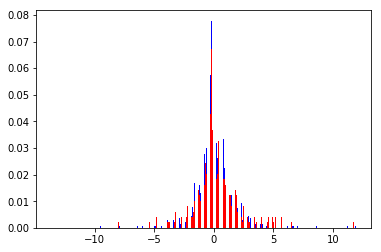

In [322]:
a=male['real_exp'].values
a=[round(i,1) for i in a]
labels, values = zip(*sorted(Counter(a).items(),key=lambda i:i[0]))
values=[i/len(a) for i in values]
plt.bar(labels, values, 0.05,color='blue')
a=female['real_exp'].values
a=[round(i,1) for i in a]
labels, values = zip(*sorted(Counter(a).items(),key=lambda i:i[0]))
values=[i/len(a) for i in values]
plt.bar(labels, values, 0.05,color='red')
# plt.title('Female')
plt.show()

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


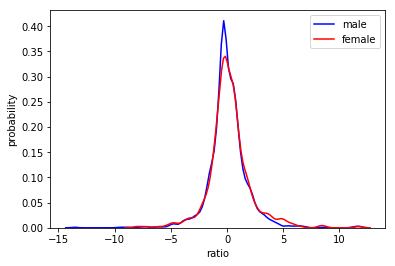

In [323]:
sns.distplot(list([i for i in male['real_exp'].values]), hist=False, kde=True,color='blue',label='male')
sns.distplot(list([i for i in female['real_exp'].values]), hist=False, kde=True,color='red',label='female')
# plt.plot([1,1],[0,1],'--')
# plt.xlim(-1,2)
plt.legend()
plt.ylabel('probability')
plt.xlabel('ratio')
plt.show()

0.4837390563290813

In [ ]:
m=[i for i in male['k'].values]
f=[i for i in female['k'].values]
for j in m:
    sns.kdeplot([q[0] for q in j], bw=0.5,color='blue')
for j in f:
    sns.kdeplot([q[0] for q in j], bw=0.5,color='red')
plt.ylabel('Probability',fontsize=15)
plt.title('Movie (short)',fontsize=20)

Text(0.5, 1.0, 'Movie (short)')

2019-05-27 01:36:16,952 : ERROR : Uncaught exception, closing connection.
Traceback (most recent call last):
  File "/home/sysadmin/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/sysadmin/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store

In [525]:
IMDB1['max']=IMDB1['cum_e'].apply(lambda x: list(x).index(max(x)))

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [581]:
def b_a(x,y):
    try:
        b=len([i for i in x if i<int(y)])
        return b/len(x)
    except Exception as e:
        np.nan

In [537]:
IMDB1['max'].values

54

In [582]:
IMDB1['b_a']=IMDB1.apply(lambda row: b_a(row['tp'],row['max']),axis=1)

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [444]:
male=IMDB1[(IMDB1['lead_gender']=='male')]
female=IMDB1[(IMDB1['lead_gender']=='female')]

In [573]:
male['K'].describe()

count    4337.000000
mean        0.080403
std         0.088289
min         0.000000
25%         0.000000
50%         0.059282
75%         0.132017
max         0.712647
Name: K, dtype: float64

In [574]:
female['K'].describe()

count    1750.000000
mean        0.090102
std         0.093724
min         0.000000
25%         0.000000
50%         0.073490
75%         0.145334
max         0.735678
Name: K, dtype: float64

In [575]:
v,p=stats.ttest_ind([i for i in male['K'].values], [i for i in female['K'].values])
p

0.0001402378870263673

In [ ]:
def hist(data):
    a=data['k'].values[0]
    a=[round(i[0],1) for i in a]
    labels, values = zip(*sorted(Counter(a).items(),key=lambda i:i[0]))
    values=[i/len(a) for i in values]
    plt.bar(labels, values, 0.1)
    plt.xticks(np.arange(-2,2.5,0.5))
    plt.legend()

In [589]:
a=male['b_a'].values

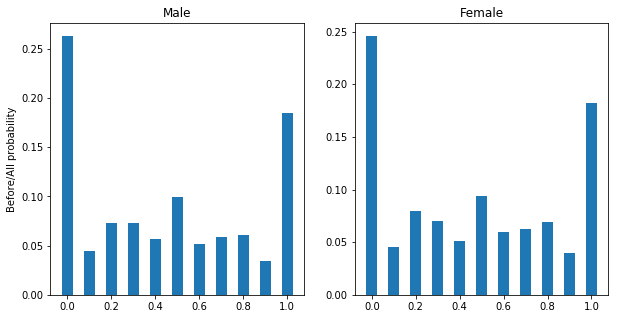

In [595]:
fig = plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,2,1)
a=male['b_a'].values
a=[round(i,1) for i in a]
labels, values = zip(*sorted(Counter(a).items(),key=lambda i:i[0]))
values=[i/len(a) for i in values]
plt.bar(labels, values, 0.05)
plt.title('Male')
plt.ylabel('Before/All probability')
ax=fig.add_subplot(1,2,2)
a=female['b_a'].values
a=[round(i,1) for i in a]
labels, values = zip(*sorted(Counter(a).items(),key=lambda i:i[0]))
values=[i/len(a) for i in values]
plt.bar(labels, values, 0.05)
plt.title('Female')
plt.show()

In [445]:
# sns.set(style="whitegrid")
sns.set(rc={"font.style":"normal",
#             "axes.facecolor":bg_color,
#             "figure.facecolor":bg_color,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':15,
            'font.size':20,
            'ytick.labelsize':10})

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


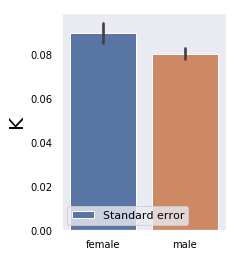

In [576]:
fig = plt.figure(figsize=(10,4))
ax=fig.add_subplot(1,3,1)
sns.barplot(x='lead_gender',y='K',data = IMDB1,label='Standard error')
ax.set_xlabel(None,fontsize=20)
ax.set_ylabel('K',fontsize=20)
plt.legend()

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


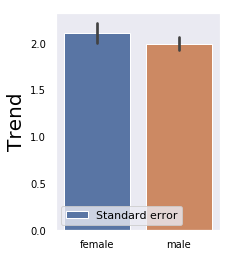

In [561]:
fig = plt.figure(figsize=(10,4))
ax=fig.add_subplot(1,3,1)
sns.barplot(x='lead_gender',y='K',data = IMDB1,label='Standard error')
ax.set_xlabel(None,fontsize=20)
ax.set_ylabel('Trend',fontsize=20)
plt.legend()
# ax=fig.add_subplot(1,3,2)
# sns.barplot(x='lead_gender',y='trend1',data = IMDB1,label='absolute positive')
# ax.set(ylabel=None,xlabel=None)
# plt.legend()
# ax=fig.add_subplot(1,3,3)
# sns.barplot(x='lead_gender',y='trend2',data = IMDB1,label='absolute negative')
# ax.set(ylabel=None,xlabel=None)
# plt.legend()
# plt.tight_layout()
# plt.show()

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


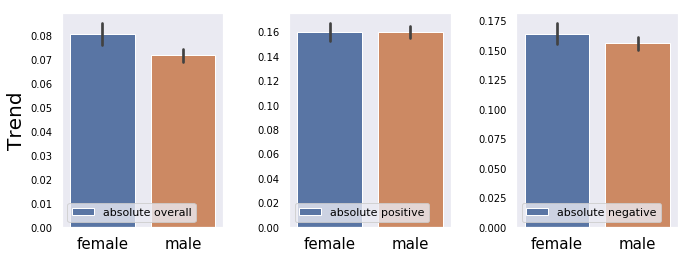

In [446]:
fig = plt.figure(figsize=(10,4))
ax=fig.add_subplot(1,3,1)
sns.barplot(x='lead_gender',y='trend',data = IMDB1,label='absolute overall')
ax.set_xlabel(None,fontsize=20)
ax.set_ylabel('Trend',fontsize=20)
plt.legend()
ax=fig.add_subplot(1,3,2)
sns.barplot(x='lead_gender',y='trend1',data = IMDB1,label='absolute positive')
ax.set(ylabel=None,xlabel=None)
plt.legend()
ax=fig.add_subplot(1,3,3)
sns.barplot(x='lead_gender',y='trend2',data = IMDB1,label='absolute negative')
ax.set(ylabel=None,xlabel=None)
plt.legend()
plt.tight_layout()
plt.show()

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


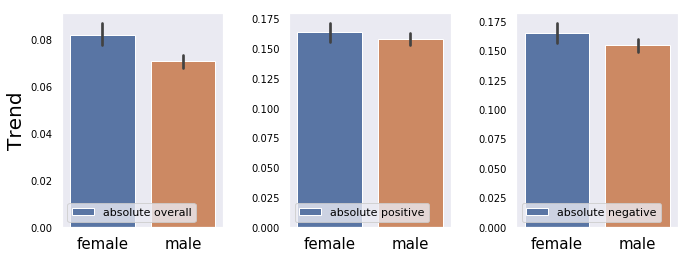

In [1096]:
fig = plt.figure(figsize=(10,4))
ax=fig.add_subplot(1,3,1)
sns.barplot(x='lead_gender',y='trend',data = IMDB1,label='absolute overall')
ax.set_xlabel(None,fontsize=20)
ax.set_ylabel('Trend',fontsize=20)
plt.legend()
ax=fig.add_subplot(1,3,2)
sns.barplot(x='lead_gender',y='trend1',data = IMDB1,label='absolute positive')
ax.set(ylabel=None,xlabel=None)
plt.legend()
ax=fig.add_subplot(1,3,3)
sns.barplot(x='lead_gender',y='trend2',data = IMDB1,label='absolute negative')
ax.set(ylabel=None,xlabel=None)
plt.legend()
plt.tight_layout()
plt.show()

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


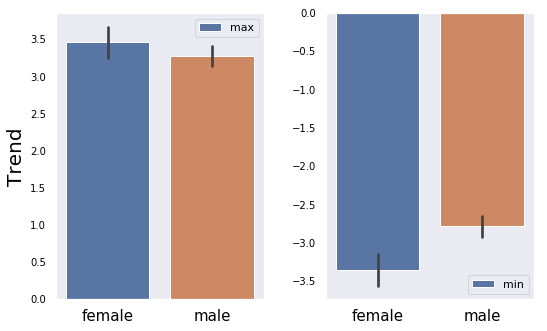

In [1085]:
fig = plt.figure(figsize=(8,5))
ax=fig.add_subplot(1,2,1)
sns.barplot(x='lead_gender',y='trend',data = IMDB1,label='max')
ax.set_xlabel(None,fontsize=20)
ax.set_ylabel('Trend',fontsize=20)
plt.legend()
ax=fig.add_subplot(1,2,2)
sns.barplot(x='lead_gender',y='trend1',data = IMDB1,label='min')
# plt.yscale('log')
# plt.yticks([-5,5])
ax.set(ylabel=None,xlabel=None)
plt.legend()
plt.tight_layout()
plt.show()

### genres

In [467]:
import copy
IMDB2 = copy.deepcopy(IMDB1)
IMDB2['g_len']=IMDB2['genres'].apply(lambda x: len(x.split(',')))
df=IMDB2[IMDB2['g_len']==1]
df1=IMDB2[IMDB2['g_len']==2]
df1_1=copy.deepcopy(df1)
df1['genres']=df1['genres'].apply(lambda x: x.split(',')[0])
df1_1['genres']=df1_1['genres'].apply(lambda x: x.split(',')[1])
df2=IMDB2[IMDB2['g_len']==3]
df2_1=copy.deepcopy(df2)
df2_2=copy.deepcopy(df2)
df2['genres']=df2['genres'].apply(lambda x: x.split(',')[0])
df2_1['genres']=df2_1['genres'].apply(lambda x: x.split(',')[1])
df2_2['genres']=df2_2['genres'].apply(lambda x: x.split(',')[2])
data=pd.DataFrame()
data=data.append(df)
data=data.append(df1)
data=data.append(df1_1)
data=data.append(df2)
data=data.append(df2_1)
data=data.append(df2_2)
data=data.reset_index(drop=True)
data=data[data['genres']!='\\N']

In [482]:
sns.set(rc={"font.style":"normal",
#             "axes.facecolor":bg_color,
#             "figure.facecolor":bg_color,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':10,
            'font.size':20,
            'ytick.labelsize':10})

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


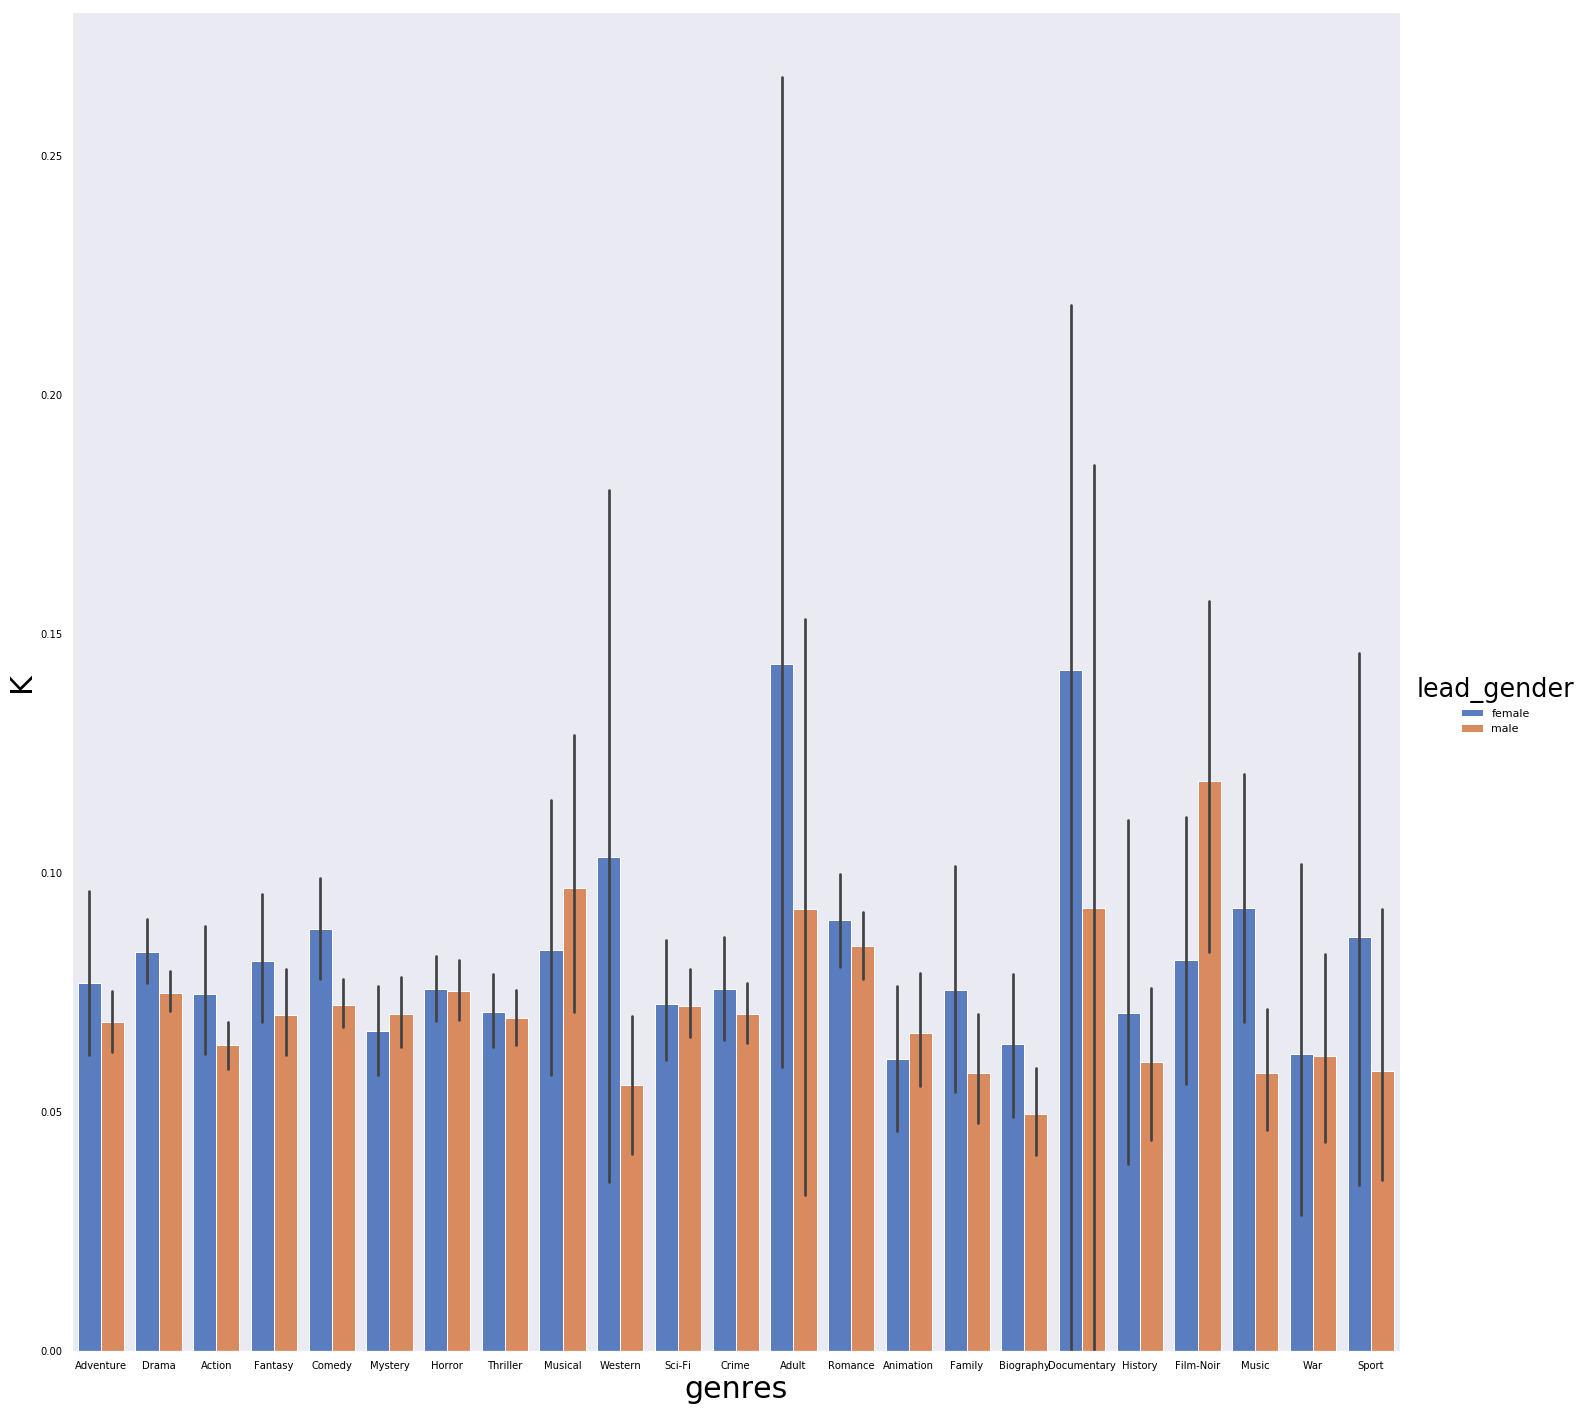

In [483]:
plt.style.use({'figure.figsize':(20, 4)})

# fig = plt.figure(figsize=(12,5))
# ax=fig.add_subplot(1,1,1)
sns.catplot(x="genres", y="K", hue="lead_gender", data=data,
                height=20, kind="bar", palette="muted")
# g.despine(left=True)
# g.set_ylabels("survival probability")
style="whitegrid"
plt.show()

In [484]:
IMDB2['startYear'].describe()

count    6087.000000
mean     1992.998521
std        22.559714
min      1913.000000
25%      1980.000000
50%      2002.000000
75%      2010.000000
max      2019.000000
Name: startYear, dtype: float64

In [485]:
int(1913/10)*10

1910

In [486]:
IMDB2['year']=IMDB2['startYear'].apply(lambda x: int(x/10)*10)

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


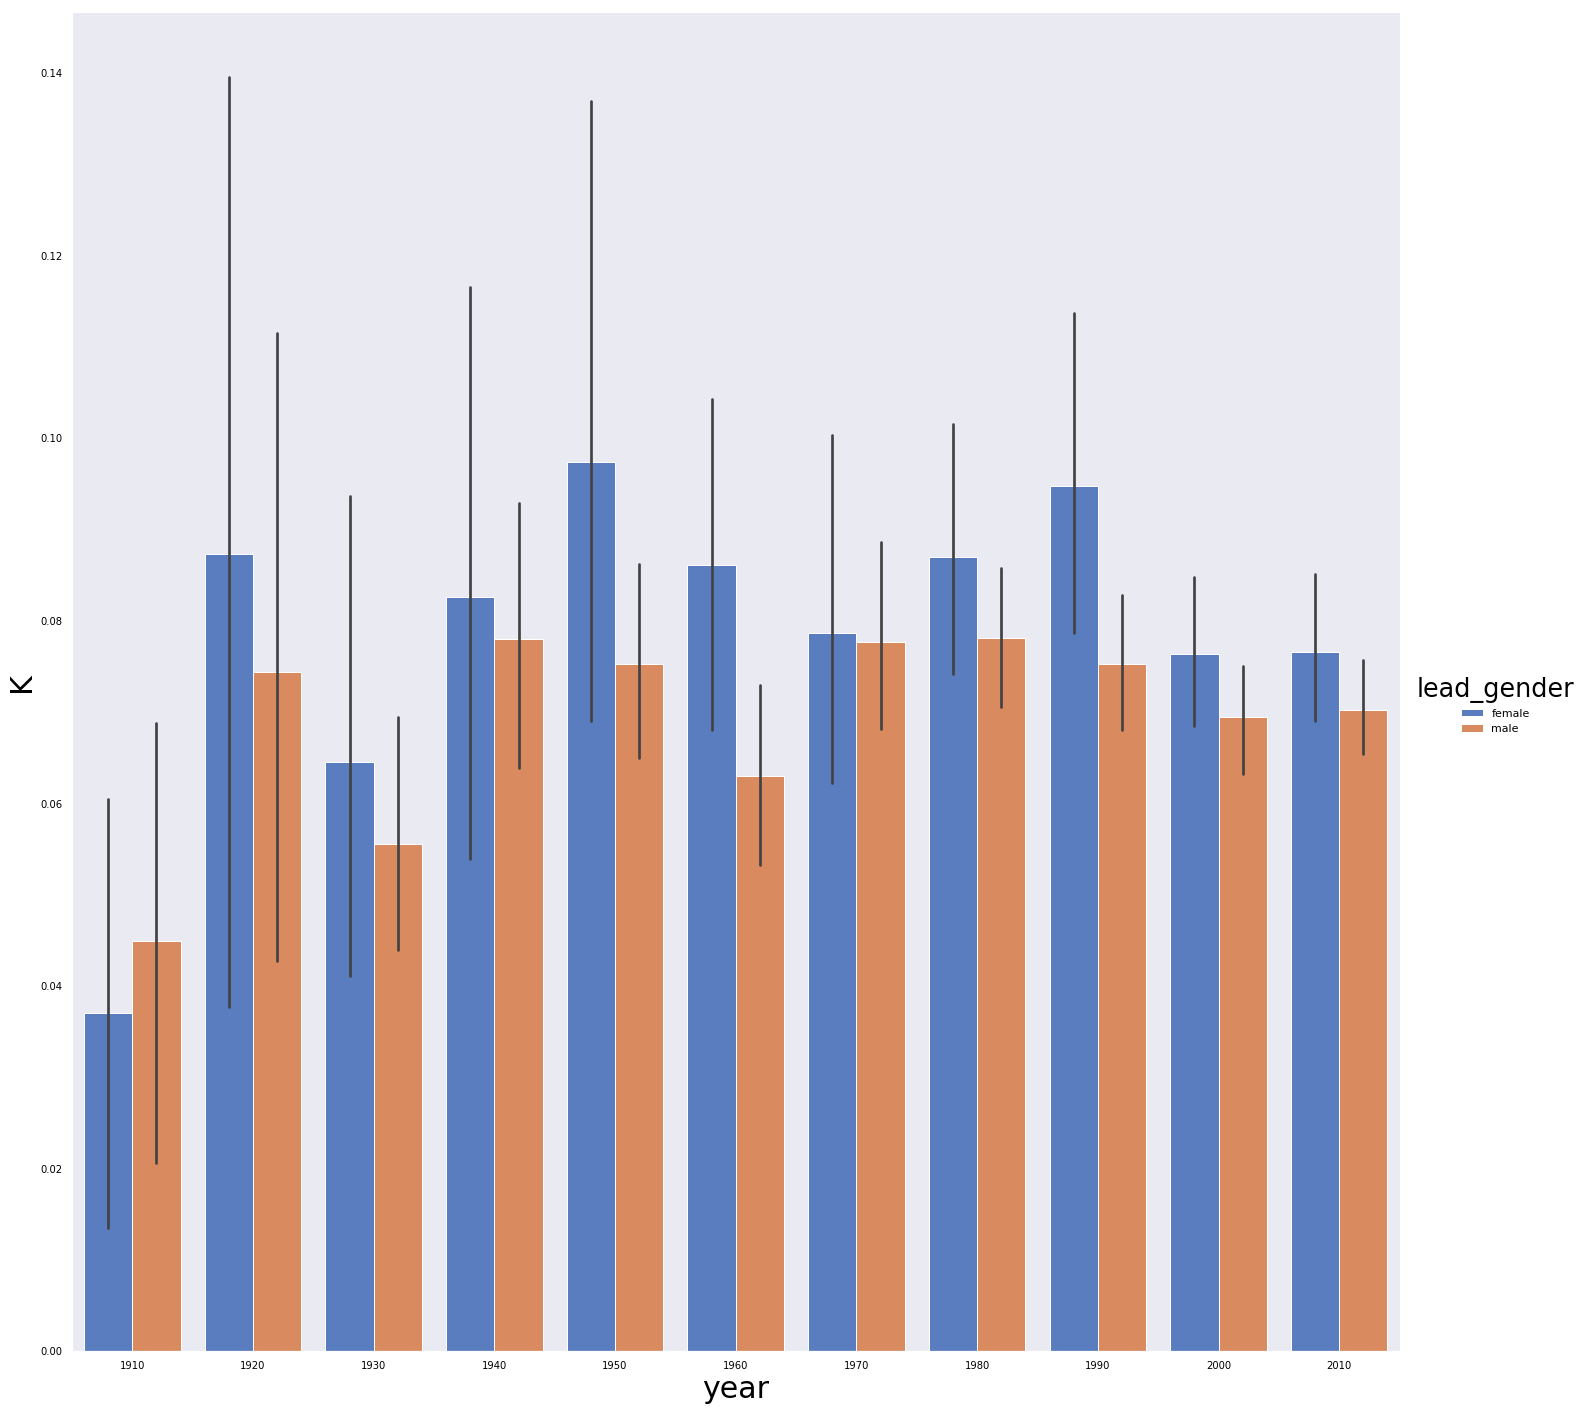

In [488]:
plt.style.use({'figure.figsize':(20, 4)})

# fig = plt.figure(figsize=(12,5))
# ax=fig.add_subplot(1,1,1)
sns.catplot(x="year", y="K", hue="lead_gender", data=IMDB2,
                height=20, kind="bar", palette="muted")
# g.despine(left=True)
# g.set_ylabels("survival probability")
style="whitegrid"
plt.show()

In [489]:
IMDB2['numVotes'].describe()

count    6.087000e+03
mean     6.282467e+04
std      1.350376e+05
min      5.000000e+00
25%      1.102500e+03
50%      9.634000e+03
75%      5.658450e+04
max      1.811294e+06
Name: numVotes, dtype: float64

In [491]:
IMDB2['votes']=IMDB2['numVotes'].apply(lambda x: 10**int(len(str(int(x)))))

IMDB2['rating']=IMDB2['averageRating'].apply(lambda x: round(x))

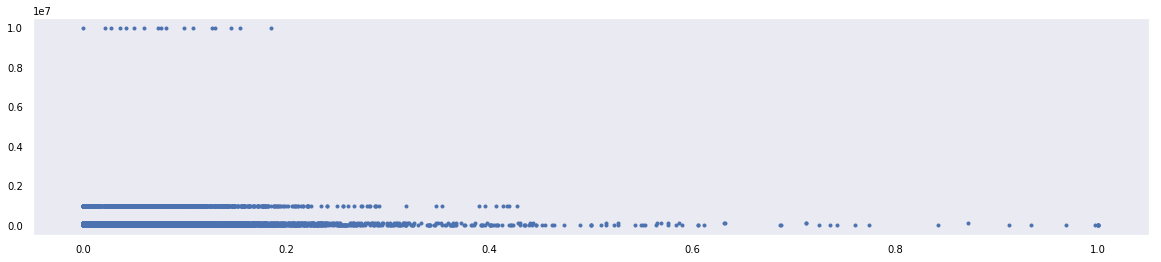

In [494]:
plt.plot(IMDB2['K'].values,IMDB2['votes'].values,'.')

In [509]:
female=IMDB2[IMDB2['lead_gender']=='female']

In [546]:
m=female['K'].mean()

In [547]:
m

0.08072762497660975

In [548]:
female['K_']=female['K'].apply(lambda x: 'low' if x<=m else 'high')

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [549]:
female[female['K_']=='low']['averageRating'].mean()

6.210757717492983

In [550]:
female[female['K_']=='high']['averageRating'].mean()

6.198091042584434

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


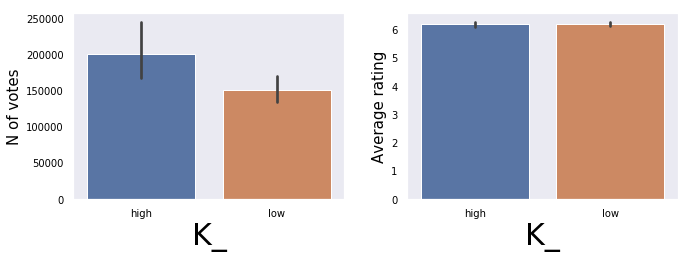

In [551]:
fig = plt.figure(figsize=(10,4))
ax=fig.add_subplot(1,2,1)
sns.barplot(x='K_',y='votes',data = female)
ax.set_ylabel(None,fontsize=15)
plt.ylabel('N of votes')
 
ax=fig.add_subplot(1,2,2)
sns.barplot(x='K_',y='averageRating',data = female)
ax.set_ylabel('Average rating',fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
plt.style.use({'figure.figsize':(10, 4)})

# fig = plt.figure(figsize=(12,5))
# ax=fig.add_subplot(1,1,1)
sns.catplot(x="K_", y="votes", hue="lead_gender", data=IMDB2,
                height=10, kind="bar", palette="muted")
# g.despine(left=True)
# g.set_ylabels("survival probability")
style="whitegrid"
plt.show()

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


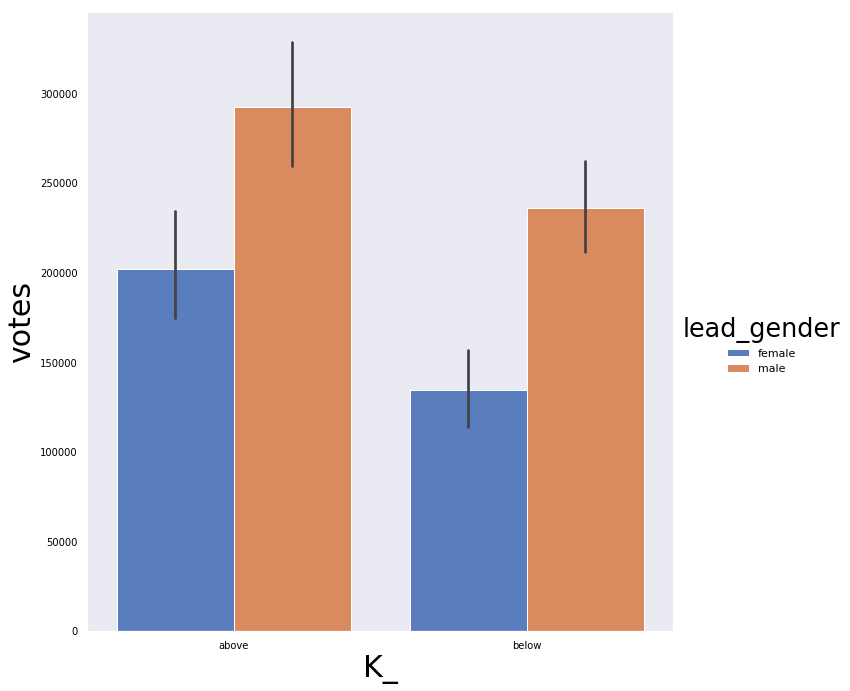

In [508]:
plt.style.use({'figure.figsize':(10, 4)})

# fig = plt.figure(figsize=(12,5))
# ax=fig.add_subplot(1,1,1)
sns.catplot(x="K_", y="votes", hue="lead_gender", data=IMDB2,
                height=10, kind="bar", palette="muted")
# g.despine(left=True)
# g.set_ylabels("survival probability")
style="whitegrid"
plt.show()

/home/sysadmin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


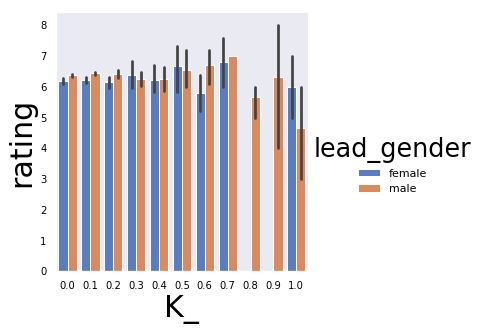

In [504]:
plt.style.use({'figure.figsize':(20, 4)})

# fig = plt.figure(figsize=(12,5))
# ax=fig.add_subplot(1,1,1)
sns.catplot(x="K_", y="rating", hue="lead_gender", data=IMDB2,
                height=5, kind="bar", palette="muted")
# g.despine(left=True)
# g.set_ylabels("survival probability")
style="whitegrid"
plt.show()

In [1312]:
IMDB=pd.read_csv('./IMDB/IMDB_e2.csv')

In [1313]:
len(IMDB)

9685

In [1314]:
data6=pd.read_csv('./data-7.tsv',sep='\t')
data6=data6.drop(['job'],axis=1)
data6=data6[data6['characters']!='\\N']

In [1315]:
data6=data6[data6['tconst'].isin(IMDB['tconst'].values)]

In [1316]:
len(data6)

39744

In [1317]:
files1=[] #choose the film with male & female protagonists
for i,f in enumerate(IMDB['tconst'].values):
    flushPrint(i)
    df=data6[data6['tconst']==f]
    df=df.sort_values(by='ordering')
    male = df[df['category']=='actor']['ordering'].values[0]
    female = df[df['category']=='actress']['ordering'].values[0]
    if abs(male-female)>1:
        files1.append(f)

9684

In [1318]:
len(files1)

3509

In [1363]:
IMDB=IMDB[IMDB['tconst'].isin(files1)]

In [1364]:
len(IMDB)

2099

In [1438]:
IMDB.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,len,character,tp,emotion,l,lead_gender
1,tt0003159,movie,"Les Misérables, Part 2: Fantine",Les misérables - Époque 2: Fantine,0,1913.0,\N,300,Drama,5.6,20.0,37.0,"['Javert', 'Fantine', 'male']","[10, 14, 31]","[0.4871551620607046, 3.964697032495806, 0.7739...",34.0,female
12,tt0004972,movie,The Birth of a Nation,The Birth of a Nation,0,1915.0,\N,195,"Drama,History,War",6.6,20162.0,7.0,NaN,NaN,NaN,NaN,female
18,tt0009241,movie,Johanna Enlists,Johanna Enlists,0,1918.0,\N,72,"Comedy,Romance",6.5,584.0,36.0,NaN,NaN,NaN,NaN,female
21,tt0009652,movie,Stella Maris,Stella Maris,0,1918.0,\N,84,Drama,7.3,1295.0,26.0,"['John', 'Stella', 'female']","[3, 4, 5, 15, 17, 21]","[1.5684264194713318, -0.5209002882467644, 6.29...",24.0,female
25,tt0010323,movie,The Cabinet of Dr. Caligari,Das Cabinet des Dr. Caligari,0,1920.0,\N,76,"Fantasy,Horror,Mystery",8.1,49144.0,51.0,"['Caligari', 'Jane', 'male']","[22, 23, 44]","[-3.4846157682917323, 3.9317221896081698, 0.56...",46.0,male


In [1476]:
df=data6[data6['tconst']=='tt0003596']

In [1477]:
df

,tconst,ordering,nconst,category,characters
19084,tt0003596,10,nm0177330,actor,"[""Mr. Cambridge""]"
19085,tt0003596,1,nm0298301,actress,"[""Dolly Desmond""]"
19086,tt0003596,2,nm0098089,actor,"[""Daddy - the Office Boy""]"
19087,tt0003596,3,nm0644728,actor,"[""James Malone""]"
19093,tt0003596,9,nm0624752,actor,"[""High Officer of the Secret Society [Ch. 5]""]"


In [1478]:
df=df.sort_values(by='ordering')

In [1479]:
male = df[df['category']=='actor']['ordering'].values[0]

In [1480]:
female = df[df['category']=='actress']['ordering'].values[0]

In [ ]:
IMDB1[IMDB1['tconst']=='tt0109830']['character']